In [370]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import time
from sklearn.metrics import confusion_matrix
from scipy.stats import f_oneway
from random import randint
from sklearn.ensemble import StackingClassifier
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from phik import phik_matrix
from sklearn.inspection import permutation_importance
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import StackingClassifier

#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeCV

#imbalanced methods
from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import AllKNN

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Importing the Csv's for modeling

In [371]:
X_multiclass = pd.read_csv('X_multiclass.csv', index_col='encounter_id')
y_multiclass = pd.read_csv('y_multiclass.csv', index_col='encounter_id')

In [222]:
#X_multiclass.shape

(71236, 38)

# Feature Selection

### Univariate Methods

In [224]:
#X_multiclass.dtypes

race                              int64
payer_code                        int64
admission_type                    int64
medical_specialty                 int64
discharge_disposition             int64
admission_source                  int64
primary_diagnosis_types           int64
secondary_diagnosis_types         int64
additional_diagnosis_types        int64
glucose_test_result               int64
a1c_test_result                   int64
outpatient_visits                 int64
emergency_visits                  int64
inpatient_visits                  int64
average_pulse_bpm                 int64
length_of_stay                    int64
number_lab_tests                  int64
non_lab_procedures                int64
number_of_medications             int64
number_diagnoses                  int64
race_caucasian                    int64
number_generic_medications        int64
insulin                           int64
metformin                         int64
Sulfonylureas                     int64


In [372]:
metric_features = ['average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
            'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'outpatient_visits','number_encounters_total',
            'emergency_visits', 'inpatient_visits', 'Midpoint_Age', 'Total_visits', 'Serious_condition_visits']

In [226]:
#X_multiclass[metric_features].var()

average_pulse_bpm             530.865611
length_of_stay                  8.932562
number_lab_tests              385.844265
non_lab_procedures              2.912702
number_of_medications          65.972521
number_diagnoses                3.755102
number_generic_medications      0.845240
outpatient_visits               1.657577
number_encounters_total         3.344978
emergency_visits                0.829654
inpatient_visits                1.605976
Midpoint_Age                  249.683263
Total_visits                    5.268215
Serious_condition_visits        3.063149
dtype: float64

Since the is no variance equal to 0, then there is no numerical variable that is univariate. With that in mind, we don´t need to drop any column. Adding to this, we can say that there are some numerical variables with high variance like Midpoint_Age, number_lab_tests and average_pulse_bpm (we could also say number_of_medications), and some with low variance like emergency_visits and number_prescriptions.

### Correlation indices

In [227]:
#def cor_heatmap(cor):
#    plt.figure(figsize=(12,10))
#    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
#    plt.show()

In [228]:
#cor_spearman = X_multiclass[metric_features].corr(method='spearman')
#cor_spearman

average_pulse_bpm  length_of_stay  \
average_pulse_bpm                    1.000000        0.003006   
length_of_stay                       0.003006        1.000000   
number_lab_tests                    -0.000470        0.334732   
non_lab_procedures                  -0.001664        0.187432   
number_of_medications                0.003578        0.464411   
number_diagnoses                    -0.000995        0.238345   
number_generic_medications           0.000246        0.087923   
outpatient_visits                    0.004919       -0.011770   
number_encounters_total             -0.001290        0.069399   
emergency_visits                    -0.000605       -0.002405   
inpatient_visits                     0.003648        0.095458   
Midpoint_Age                         0.004508        0.122952   
Total_visits                         0.004480        0.057833   
Serious_condition_visits             0.003557        0.082313   

                            number_lab_tests  non_lab_procedures  \
average_pulse_bpm                  -0.000470           -0.001664   
length_of_stay                      0.334732            0.187432   
number_lab_tests                    1.000000            0.019744   
non_lab_procedures                  0.019744            1.000000   
number_of_medications               0.248156            0.351296   
number_diagnoses                    0.170754            0.067938   
number_generic_medications          0.029600           -0.005732   
outpatient_visits                  -0.024084           -0.022472   
number_encounters_total            -0.010114           -0.076963   
emergency_visits                    0.006062           -0.044001   
inpatient_visits                    0.042622           -0.063171   
Midpoint_Age                        0.029129           -0.061946   
Total_visits                        0.017129           -0.069209   
Serious_condition_visits            0.039038           -0.072427   

                            number_of_medications  number_diagnoses  \
average_pulse_bpm                        0.003578         -0.000995   
length_of_stay                           0.464411          0.238345   
number_lab_tests                         0.248156          0.170754   
non_lab_procedures                       0.351296          0.067938   
number_of_medications                    1.000000          0.295009   
number_diagnoses                         0.295009          1.000000   
number_generic_medications               0.237610          0.011204   
outpatient_visits                        0.073333          0.111084   
number_encounters_total                  0.085056          0.131426   
emergency_visits                         0.044138          0.091856   
inpatient_visits                         0.101668          0.138303   
Midpoint_Age                             0.027903          0.198487   
Total_visits                             0.109820          0.170281   
Serious_condition_visits                 0.098966          0.151112   

                            number_generic_medications  outpatient_visits  \
average_pulse_bpm                             0.000246           0.004919   
length_of_stay                                0.087923          -0.011770   
number_lab_tests                              0.029600          -0.024084   
non_lab_procedures                           -0.005732          -0.022472   
number_of_medications                         0.237610           0.073333   
number_diagnoses                              0.011204           0.111084   
number_generic_medications                    1.000000           0.004139   
outpatient_visits                             0.004139           1.000000   
number_encounters_total                       0.008618           0.132218   
emergency_visits                              0.016973           0.178881   
inpatient_visits                             -0.017076           0.155495   
Midpoint_Age                             

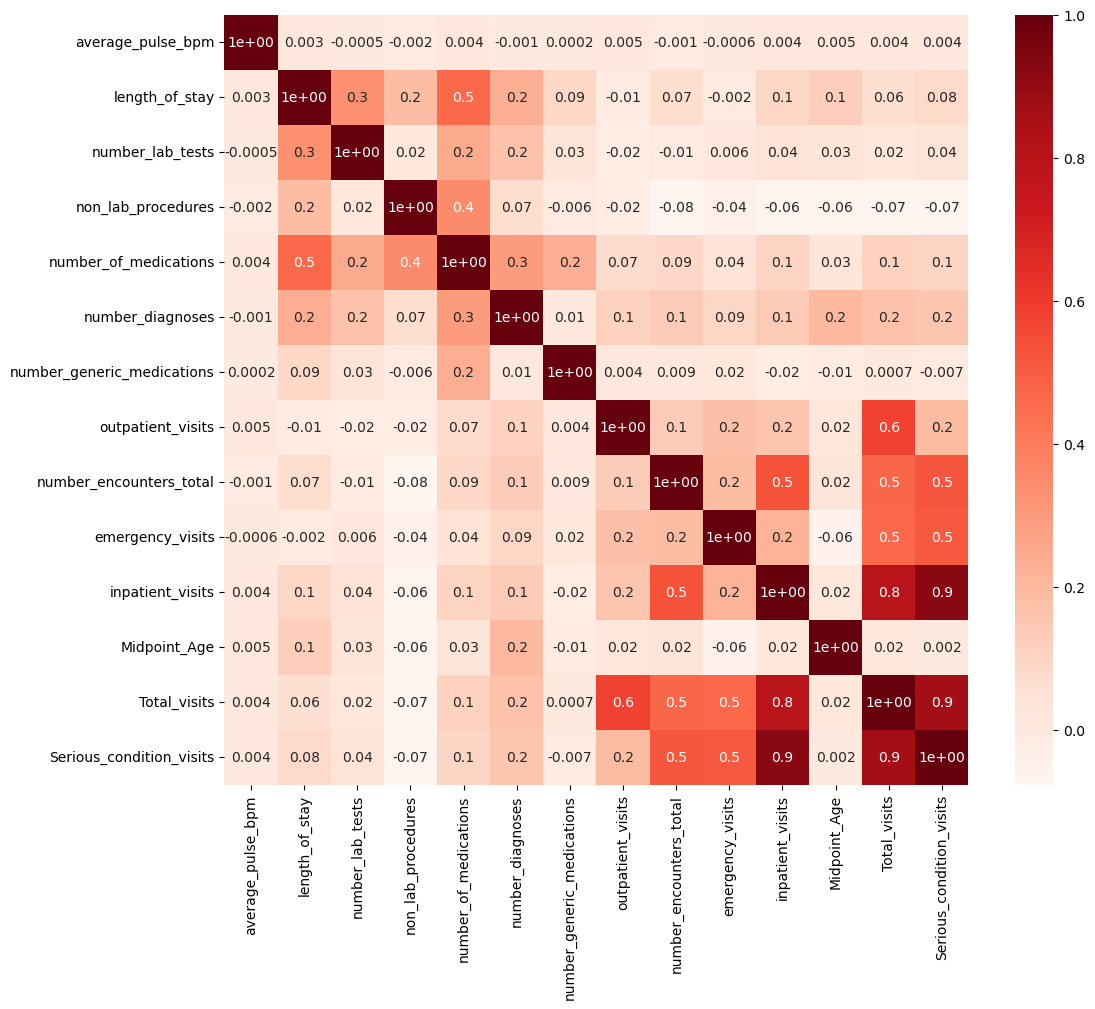

In [229]:
#cor_spearman = X_multiclass[metric_features].corr(method ='spearman')
#cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are three pairs of variables that are highly correlated:
    - inpatient_visits vs Total_visits (0.80) 
    - inpatient_visits vs Serious_condition_visists (0.92)
    - Total_visits vs Serious_condition_visits (0.87)

### Chi-square

In [230]:
# TestIndependence(X,y,var,alpha=0.05):        
#    dfObserved = pd.crosstab(X,y) 
#    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
#    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
#    if p<alpha:
#        result="{0} is IMPORTANT for Prediction".format(var)
#    else:
#        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
        
#    print(result)

In [373]:
categorical_columns = ['race','payer_code','admission_type','medical_specialty','discharge_disposition','admission_source',
                      'primary_diagnosis_types', 'secondary_diagnosis_types','additional_diagnosis_types','glucose_test_result',
                      'a1c_test_result','race_caucasian','metformin','insulin','Sulfonylureas','Meglitinides',
                      'Thiazolidinediones','Alpha_Glucosidase_Inhibitors','Combination_Medications','gender_binary',
                      'presc_diabetes_meds_binary','change_in_meds_binary','Has_Insurance','is_normal_pulse']

In [374]:
X_multiclass_categorical = X_multiclass[categorical_columns]

In [233]:
#X_multiclass_categorical

race  payer_code  admission_type  medical_specialty  \
encounter_id                                                         
533253        51779       28201           50779               5217   
426224        12977       28201           50779              34922   
634063        51779       28201            7246               5217   
890610        12977       22683           50779              12561   
654194        51779        4319           13211              34922   
...             ...         ...             ...                ...   
660160        12977       22683           13211              12561   
826429        12977       28201           50779              34922   
332030        51779       28201            7246              34922   
757560        51779        3292           50779               5319   
459757        51779        3292           50779               5524   

              discharge_disposition  admission_source  \
encounter_id                                            
533253                        51342             40319   
426224                        12978             21586   
634063                        51342              4913   
890610                        51342              4418   
654194                        51342             21586   
...                             ...               ...   
660160                        51342             21586   
826429                         3269             21586   
332030                         3269              4913   
757560                        12978             40319   
459757                        51342             40319   

              primary_diagnosis_types  secondary_diagnosis_types  \
encounter_id                                                       
533253                          10137                       5746   
426224                           1968                      22345   
634063                           6667                       1358   
890610                           6667                       2897   
654194                           3443                       5866   
...                               ...                        ...   
660160                          21288                       7647   
826429                           2424                       1765   
332030                          21288                       7647   
757560                           4881                       1765   
459757                          21288                       8938   

              additional_diagnosis_types  glucose_test_result  \
encounter_id                                                    
533253                              5130                67548   
426224                              1297                67548   
634063                             11927                67548   
890610                             21234                67548   
654194                             21234                67548   
...                                  ...                  ...   
660160                             11927                67548   
826429                              4550                67548   
332030                              6368                 1882   
757560                             11927                67548   
459757                             21234                67548   

              a1c_test_result  race_caucasian  metformin  insulin  \
encounter_id                                                        
533253                  59320               1          0        0   
426224                  59320               0          0        1   
634063                  59320               1          0        1   
890610                  59320               0          0        0   
654194                  59320               1          0        0   
...                       ...             ...        ...      ...   
660160                   8413               0          1        1   
826429    

TestIndependence(X_multiclass_categorical, y_multiclass,categorical_columns)

remove : Combination_Medications, is_normal_pulse, average_pulse_bpm

### Mutual information

In [234]:
#def select_features_by_mutual_info(X, y):
#    mi = mutual_info_classif(X, y)
#    
#    mi_series = pd.Series(mi)
#    mi_series.index = X.columns
#    mi_series.sort_values(ascending=False, inplace=True)
#    
#    return mi_series

In [235]:
#selected_features_MI = select_features_by_mutual_info(X_multiclass, y_multiclass)
#selected_features_MI

number_encounters_total         0.132852
Total_visits                    0.033579
Serious_condition_visits        0.033219
inpatient_visits                0.031357
discharge_disposition           0.019904
number_diagnoses                0.011186
admission_source                0.010393
emergency_visits                0.009684
race                            0.008430
glucose_test_result             0.008345
a1c_test_result                 0.007330
medical_specialty               0.006664
insulin                         0.006169
race_caucasian                  0.005838
number_generic_medications      0.005789
presc_diabetes_meds_binary      0.005296
gender_binary                   0.005056
outpatient_visits               0.005041
Has_Insurance                   0.004631
number_of_medications           0.004490
Midpoint_Age                    0.004294
average_pulse_bpm               0.003925
payer_code                      0.003590
number_lab_tests                0.003496
admission_type  

In [236]:
#selected_features_MI.head(10)

number_encounters_total     0.132852
Total_visits                0.033579
Serious_condition_visits    0.033219
inpatient_visits            0.031357
discharge_disposition       0.019904
number_diagnoses            0.011186
admission_source            0.010393
emergency_visits            0.009684
race                        0.008430
glucose_test_result         0.008345
dtype: float64

top 10 features mais relevantes: number_encounters_total, Serious_condition_visits, discharge_disposition, number_diagnoses, race_caucasian, glucose_test_result, number_of_medications, emergency_visits, race, admission_source
    

### Anova Test

In [237]:
#def select_features_by_anova(X, y, alpha=0.05):
#    numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
#    
#    for col in numerical_cols:
#        categories = X[col].unique()
#        samples = [y[X[col]==category] for category in categories]
#        f_val, p_val = f_oneway(*samples)
#        
#        if p_val < alpha:
#            print(f"{col} is important for prediction")
#        else:
#            print(f"{col} is not important for prediction. (Discard {col} from model)")

In [238]:
#select_features_by_anova(X_multiclass, y_multiclass)

race is important for prediction
payer_code is important for prediction
admission_type is important for prediction
medical_specialty is important for prediction
discharge_disposition is important for prediction
admission_source is important for prediction
primary_diagnosis_types is important for prediction
secondary_diagnosis_types is important for prediction
additional_diagnosis_types is important for prediction
glucose_test_result is important for prediction
a1c_test_result is important for prediction
outpatient_visits is important for prediction
emergency_visits is important for prediction
inpatient_visits is important for prediction
average_pulse_bpm is not important for prediction. (Discard average_pulse_bpm from model)
length_of_stay is important for prediction
number_lab_tests is important for prediction
non_lab_procedures is important for prediction
number_of_medications is important for prediction
number_diagnoses is important for prediction
race_caucasian is important for pre

remove: average_pulse_bpm, Sulfonylureas, Combination_Medications, Has_Insurance, is_normal_pulse

### Recursive Feature Selection

In [375]:
X_multiclass_metric = X_multiclass[metric_features]
#X_multiclass_metric.head()

In [240]:
#X_multiclass_metric_sqrt = np.sqrt(X_multiclass_metric) 

In [376]:
min_max = MinMaxScaler()
#X_multiclass_metric_sqrt_minmax = min_max.fit_transform(X_multiclass_metric_sqrt)

In [377]:
X_multiclass_metric_minmax = min_max.fit_transform(X_multiclass_metric)

In [243]:
#standscaler = StandardScaler()
#X_multiclass_metric_sqrt_stand = standscaler.fit_transform(X_multiclass_metric_sqrt)

In [244]:
#X_multiclass_metric_stand = standscaler.fit_transform(X_multiclass_metric)

### RFE - Random Forest

In [245]:
#X_multiclass_metric.columns

Index(['average_pulse_bpm', 'length_of_stay', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
       'number_generic_medications', 'outpatient_visits',
       'number_encounters_total', 'emergency_visits', 'inpatient_visits',
       'Midpoint_Age', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d a

Ranking of the features:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Optimal number of features: 14
Selected features: average_pulse_bpm, length_of_stay, number_lab_tests, non_lab_procedures, number_of_medications, number_diagnoses, number_generic_medications, outpatient_visits, number_encounters_total, emergency_visits, inpatient_visits, Midpoint_Age, Total_visits, Serious_condition_visits


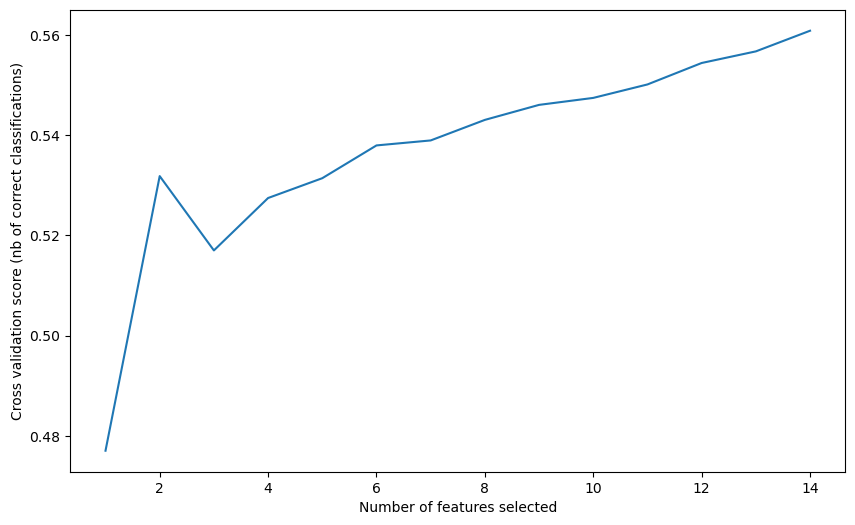

In [246]:
# Model
#rf = RandomForestClassifier(class_weight='balanced',n_estimators=50,max_depth=5,random_state=19,n_jobs=-1)

# Define the method of cross-validation
#cv = StratifiedKFold(5)

# Create the RFECV object
#rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring='f1_weighted', n_jobs=-1)

# Fit the RFECV to the training data
#rfecv.fit(X_multiclass_metric_minmax, y_multiclass)

#print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
#print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
#selected_features = X_multiclass_metric.columns[rfecv.support_]
#print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
#plt.figure(figsize=(10, 6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
#plt.show()

### RFE - Decision Trees

Ranking of the features:  [ 8  9  5 12  7  1  6 11  1 10  1  3  2  4]
Optimal number of features: 3
Selected features: number_diagnoses, number_encounters_total, inpatient_visits


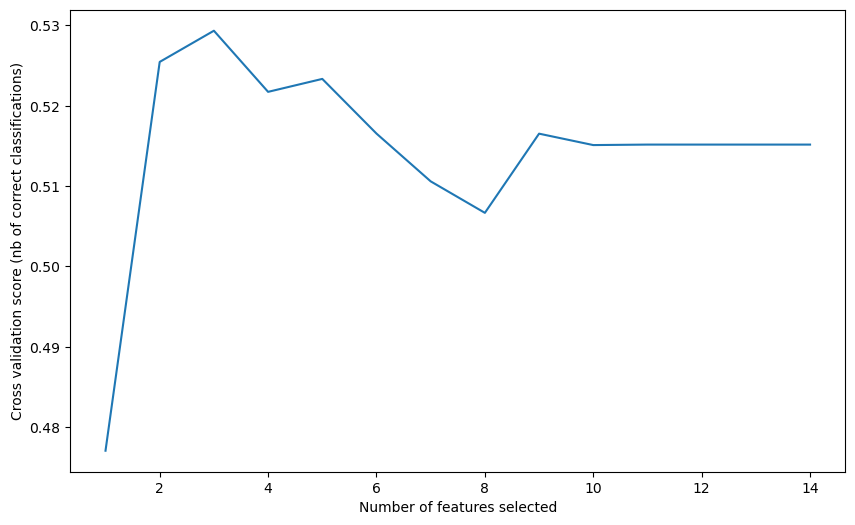

In [247]:
#dt = DecisionTreeClassifier(class_weight='balanced',max_depth=5,random_state=19) 

#cv = StratifiedKFold(5)

#rfecv = RFECV(estimator=dt, step=1, cv=cv, scoring='f1_weighted', n_jobs=-1)

#rfecv.fit(X_multiclass_metric_minmax, y_multiclass)

#print('Ranking of the features: ', rfecv.ranking_)

#print('Optimal number of features: {}'.format(rfecv.n_features_))

#selected_features = X_multiclass_metric.columns[rfecv.support_]
#print('Selected features: {}'.format(', '.join(selected_features)))

#plt.figure(figsize=(10, 6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
#plt.show()

### RFE - Logistic Regression

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when 

Ranking of the features:  [9 7 4 8 5 2 6 1 1 1 1 3 1 1]
Optimal number of features: 6
Selected features: outpatient_visits, number_encounters_total, emergency_visits, inpatient_visits, Total_visits, Serious_condition_visits


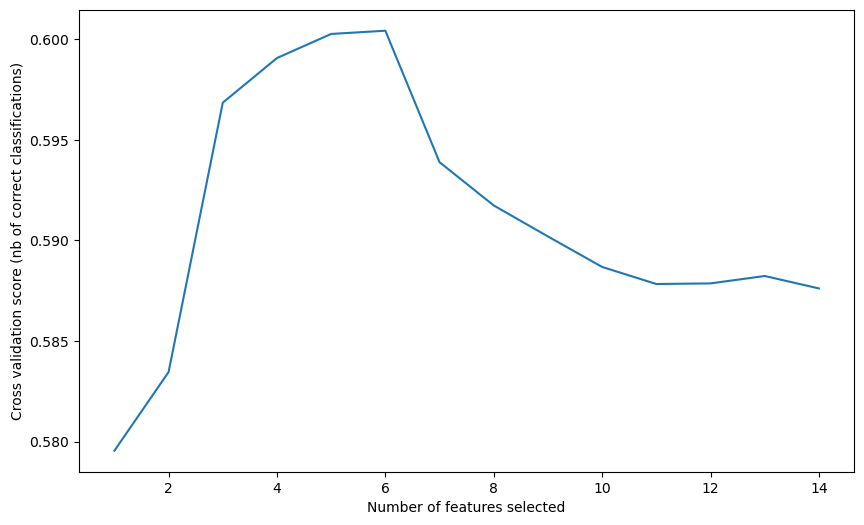

In [248]:
# Model
#lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)

# Define the method of cross-validation
#cv = StratifiedKFold(5)

# Create the RFECV object
#rfecv = RFECV(estimator=lr, step=1, cv=cv, scoring='f1_weighted', n_jobs=-1)

# Fit the RFECV to the training data
#rfecv.fit(X_multiclass_metric_minmax, y_multiclass)

#print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
#print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
#selected_features = X_multiclass_metric.columns[rfecv.support_]
#print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
#plt.figure(figsize=(10, 6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
#plt.show()

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when 

Ranking of the features:  [14 12  9 13 10  4 11  8  1  5  3  7  2  6]
Optimal number of features: 1
Selected features: number_encounters_total


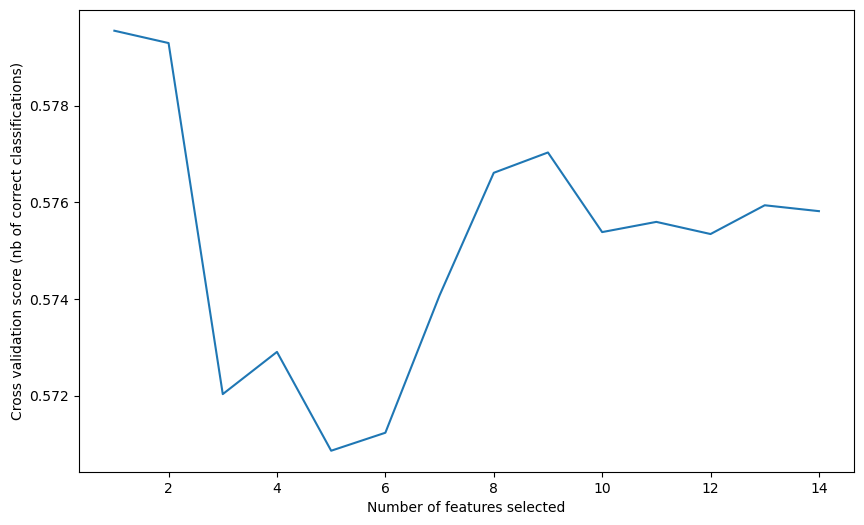

In [249]:
# Model
#lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)

# Define the method of cross-validation
#cv = StratifiedKFold(5)

# Create the RFECV object
#rfecv = RFECV(estimator=lr, step=1, cv=cv, scoring='f1_weighted', n_jobs=-1)

# Fit the RFECV to the training data
#rfecv.fit(X_multiclass_metric_sqrt_minmax, y_multiclass)

#print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
#print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
#selected_features = X_multiclass_metric.columns[rfecv.support_]
#print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
#plt.figure(figsize=(10, 6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
#plt.show()

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when 

Ranking of the features:  [8 3 1 7 5 1 2 1 1 1 1 1 4 6]
Optimal number of features: 7
Selected features: number_lab_tests, number_diagnoses, outpatient_visits, number_encounters_total, emergency_visits, inpatient_visits, Midpoint_Age


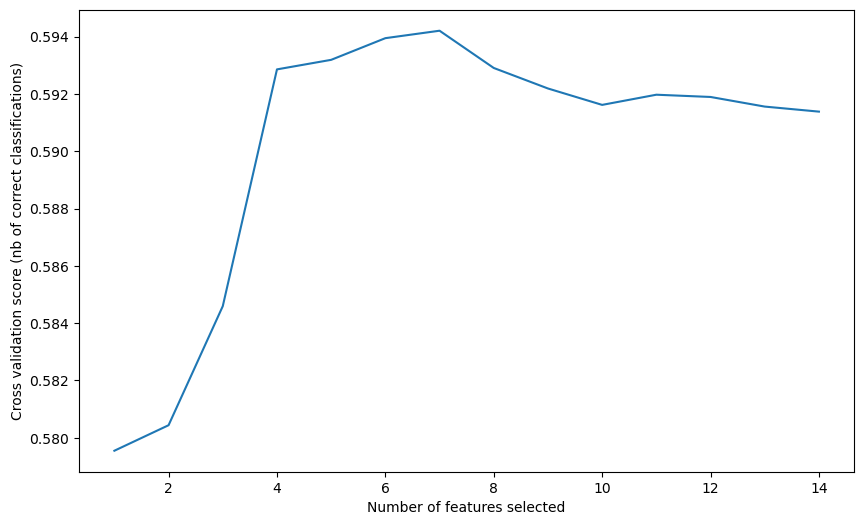

In [250]:
# Model
#lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)

# Define the method of cross-validation
#cv = StratifiedKFold(5)

# Create the RFECV object
#rfecv = RFECV(estimator=lr, step=1, cv=cv, scoring='f1_weighted', n_jobs=-1)

# Fit the RFECV to the training data
#rfecv.fit(X_multiclass_metric_stand, y_multiclass)

#print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
#print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
#selected_features = X_multiclass_metric.columns[rfecv.support_]
#print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
#plt.figure(figsize=(10, 6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
#plt.show()

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when 

Ranking of the features:  [13  8  4 11 12  3  7  9  1 10  2  5  1  6]
Optimal number of features: 2
Selected features: number_encounters_total, Total_visits


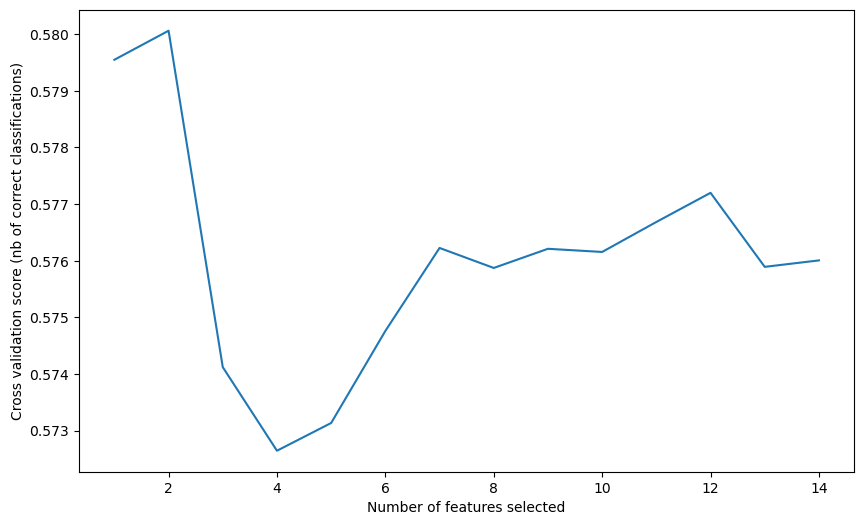

In [251]:
# Model
#lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=19, n_jobs=-1, max_iter=500)

# Define the method of cross-validation
#cv = StratifiedKFold(5)

# Create the RFECV object
#rfecv = RFECV(estimator=lr, step=1, cv=cv, scoring='f1_weighted', n_jobs=-1)

# Fit the RFECV to the training data
#rfecv.fit(X_multiclass_metric_sqrt_stand, y_multiclass)

#print('Ranking of the features: ', rfecv.ranking_)

# Print the optimal number of features
#print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the names of the selected features
#selected_features = X_multiclass_metric.columns[rfecv.support_]
#print('Selected features: {}'.format(', '.join(selected_features)))

# Plot number of features VS. cross-validation scores
#plt.figure(figsize=(10, 6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
#plt.show()

### Sequential Feature Selection

#### With Logistic Regression

In [252]:
# Sequential Feature Selection
#sfs = SequentialFeatureSelector(lr, k_features='best', scoring='f1_weighted', n_jobs=-1)
#sfs.fit(X_multiclass_metric_stand, y_multiclass)
#features = list(sfs.k_feature_names_)
#print(sfs.k_score_)
#print('Number of Selected features:', str(len(features)))

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when 

0.6009638604582366
Number of Selected features: 5


In [253]:
# Sequential Feature Selection
#sfs = SequentialFeatureSelector(lr, k_features='best', scoring='f1_weighted', n_jobs=-1)
#sfs.fit(X_multiclass_metric_minmax, y_multiclass)
#features = list(sfs.k_feature_names_)
#print(sfs.k_score_)
#print('Number of Selected features:', str(len(features)))

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when 

0.600689311098823
Number of Selected features: 3


In [254]:
#features_indexes = [int(i) for i in features]  
#features_names = X_multiclass_metric.columns[features_indexes]
#filtered_train = X_multiclass_metric[features_names]
#filtered_train.columns

Index(['outpatient_visits', 'number_encounters_total', 'inpatient_visits'], dtype='object')

#### With Random Forest

In [255]:
#sfs = SequentialFeatureSelector(rf, k_features='best', scoring='f1_weighted', n_jobs=-1)
#sfs.fit(X_multiclass_metric_minmax, y_multiclass)
#features = list(sfs.k_feature_names_)
#print(sfs.k_score_)
#print('Number of Selected features:', str(len(features)))

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d a

0.5608212734241687
Number of Selected features: 14


In [256]:
#features_indexes = [int(i) for i in features]  
#features_names = X_multiclass_metric.columns[features_indexes]
#filtered_train = X_multiclass_metric[features_names]
#filtered_train.columns

Index(['average_pulse_bpm', 'length_of_stay', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
       'number_generic_medications', 'outpatient_visits',
       'number_encounters_total', 'emergency_visits', 'inpatient_visits',
       'Midpoint_Age', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

### Feature Importance with Random Forest Classifier

In [257]:
#X_multiclass.shape

(71236, 38)

In [378]:
X_multiclass_non_metric = X_multiclass.drop(metric_features, axis=1)

In [259]:
#X_multiclass_non_metric.shape

(71236, 24)

In [260]:
#X_multiclass_non_metric.head()

race  payer_code  admission_type  medical_specialty  \
encounter_id                                                         
533253        51779       28201           50779               5217   
426224        12977       28201           50779              34922   
634063        51779       28201            7246               5217   
890610        12977       22683           50779              12561   
654194        51779        4319           13211              34922   

              discharge_disposition  admission_source  \
encounter_id                                            
533253                        51342             40319   
426224                        12978             21586   
634063                        51342              4913   
890610                        51342              4418   
654194                        51342             21586   

              primary_diagnosis_types  secondary_diagnosis_types  \
encounter_id                                                       
533253                          10137                       5746   
426224                           1968                      22345   
634063                           6667                       1358   
890610                           6667                       2897   
654194                           3443                       5866   

              additional_diagnosis_types  glucose_test_result  \
encounter_id                                                    
533253                              5130                67548   
426224                              1297                67548   
634063                             11927                67548   
890610                             21234                67548   
654194                             21234                67548   

              a1c_test_result  race_caucasian  insulin  metformin  \
encounter_id                                                        
533253                  59320               1        0          0   
426224                  59320               0        1          0   
634063                  59320               1        1          0   
890610                  59320               0        0          0   
654194                  59320               1        0          0   

              Sulfonylureas  Meglitinides  Thiazolidinediones  \
encounter_id                                                    
533253                    0             0                   0   
426224                    0             0                   0   
634063                    0             0                   0   
890610                    0             0                   0   
654194                    0             0                   0   

              Alpha_Glucosidase_Inhibitors  Combination_Medications  \
encounter_id                                                          
533253                                   0                        0   
426224                                   0                        0   
634063                                   0                        0   
890610                                   0                        0   
654194                                   0                        0   

              gender_binary  presc_diabetes_meds_binary  \
encounter_id                                              
533253                    0                           0   
426224                    1                           1   
634063                    0                           1   
890610                    1                           0   
654194                    0                           0   

              change_in_meds_binary  Has_Insurance  is_normal_pulse  
encounter_id                                                         
533253                            0              0                0  
426224                            0              0                0  
634063                            1              0         

In [261]:
#X_multiclass_metric.shape

(71236, 14)

In [262]:
#X_multiclass_metric.head()

average_pulse_bpm  length_of_stay  number_lab_tests  \
encounter_id                                                        
533253                      127               2                48   
426224                      128              14                71   
634063                       94               6                60   
890610                       81               6                48   
654194                      126               6                47   

              non_lab_procedures  number_of_medications  number_diagnoses  \
encounter_id                                                                
533253                         0                     20                 8   
426224                         0                     25                 9   
634063                         1                     22                 6   
890610                         2                      9                 5   
654194                         1                     15                 9   

              number_generic_medications  outpatient_visits  \
encounter_id                                                  
533253                                 0                  0   
426224                                 1                  0   
634063                                 2                  0   
890610                                 0                  0   
654194                                 0                  1   

              number_encounters_total  emergency_visits  inpatient_visits  \
encounter_id                                                                
533253                              6                 0                 2   
426224                              1                 0                 0   
634063                              1                 0                 1   
890610                              1                 0                 1   
654194                              2                 0                 0   

              Midpoint_Age  Total_visits  Serious_condition_visits  
encounter_id                                                        
533253                75.0             2                         2  
426224                55.0             0                         0  
634063                65.0             1                         1  
890610                65.0             1                         1  
654194                75.0             1                         0

In [379]:
X_combined = pd.concat([X_multiclass_non_metric, X_multiclass_metric], axis=1)
#X_combined.head()

In [380]:
X_multiclass_minmax = min_max.fit_transform(X_combined)

In [265]:
#model = RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=19)
#model.fit(X_multiclass_minmax, y_multiclass)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=19)

In [266]:
#intermediate_dictionary = {'Column name':X_combined.columns, 'Feature Importance':model.feature_importances_}

#feature_importance_df = pd.DataFrame(intermediate_dictionary)
#feature_importance_df.sort_values('Feature Importance', ascending=False, inplace=True)

In [267]:
#feature_importance_df

Column name  Feature Importance
32       number_encounters_total            0.440697
34              inpatient_visits            0.060247
37      Serious_condition_visits            0.059263
4          discharge_disposition            0.053426
36                  Total_visits            0.044890
26              number_lab_tests            0.029116
28         number_of_medications            0.026210
24             average_pulse_bpm            0.023303
29              number_diagnoses            0.022835
35                  Midpoint_Age            0.020540
25                length_of_stay            0.018426
7      secondary_diagnosis_types            0.017810
6        primary_diagnosis_types            0.017610
1                     payer_code            0.016079
8     additional_diagnosis_types            0.015901
5               admission_source            0.012937
27            non_lab_procedures            0.012204
3              medical_specialty            0.011542
31             outpatient_visits            0.010468
33              emergency_visits            0.010243
30    number_generic_medications            0.009493
0                           race            0.008665
2                 admission_type            0.007627
22                 Has_Insurance            0.007531
10               a1c_test_result            0.005248
20    presc_diabetes_meds_binary            0.004179
12                       insulin            0.004159
11                race_caucasian            0.003912
19                 gender_binary            0.003759
13                     metformin            0.003697
9            glucose_test_result            0.003578
14                 Sulfonylureas            0.003299
21         change_in_meds_binary            0.003272
23               is_normal_pulse            0.003055
16            Thiazolidinediones            0.002602
15                  Meglitinides            0.001302
18       Combination_Medications            0.000461
17  Alpha_Glucosidase_Inhibitors            0.000417

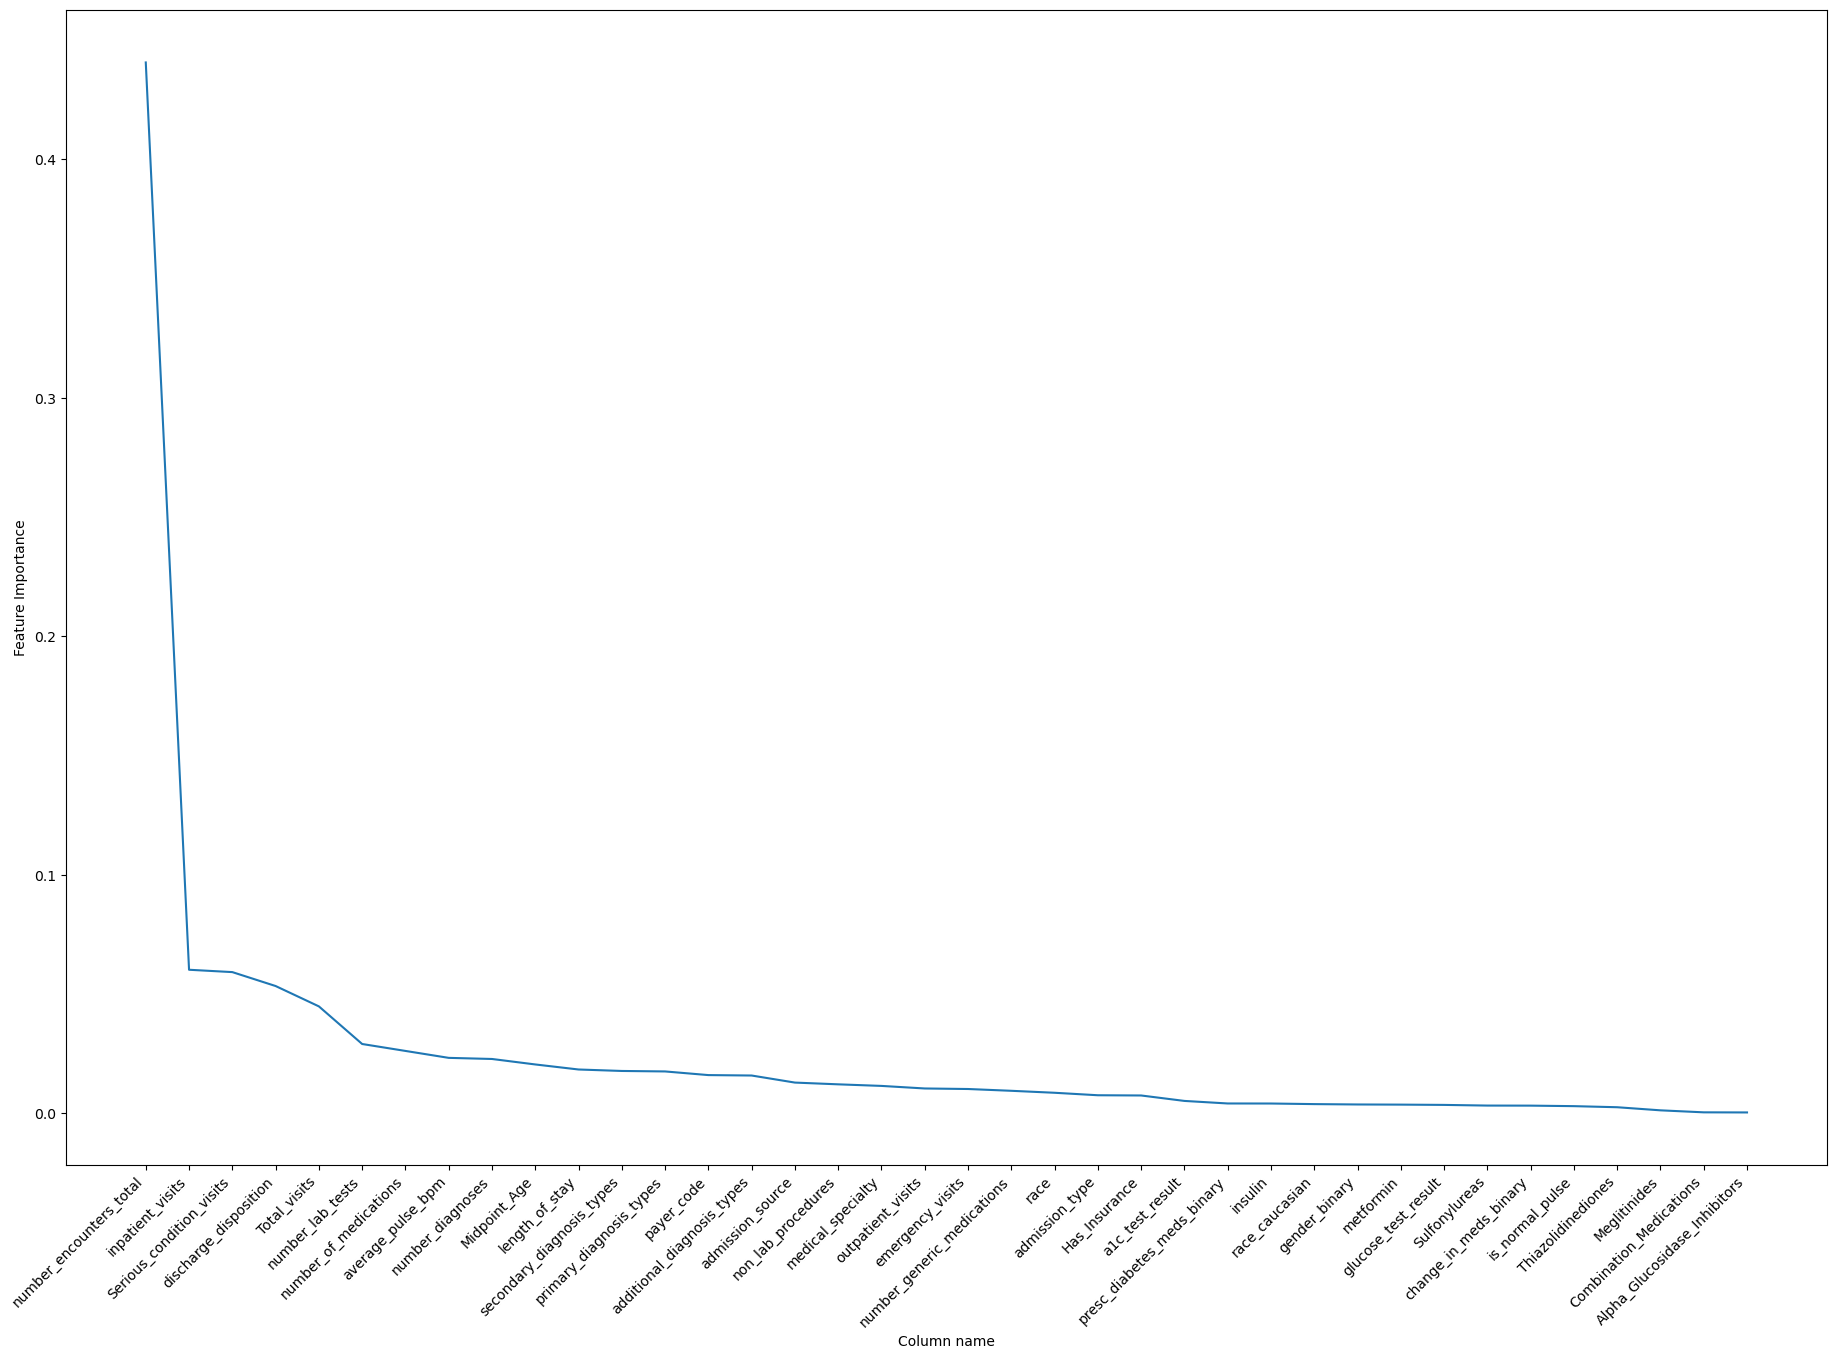

In [268]:
#fig = plt.figure(figsize=(50, 15))
#plt.subplot(122)
#sns.lineplot(feature_importance_df, x='Column name', y="Feature Importance")
#plt.xticks(rotation=45, ha="right")
#plt.show()

### With Entropy

In [269]:
#model = RandomForestClassifier(criterion='entropy', max_depth=5, class_weight='balanced', random_state=19)
#model.fit(X_multiclass_minmax, y_multiclass)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=19)

In [270]:
#intermediate_dictionary = {'Column name':X_combined.columns, 'Feature Importance':model.feature_importances_}

#feature_importance_df = pd.DataFrame(intermediate_dictionary)
#feature_importance_df.sort_values('Feature Importance', ascending=False, inplace=True)

In [271]:
#feature_importance_df

Column name  Feature Importance
32       number_encounters_total            0.546929
37      Serious_condition_visits            0.112119
34              inpatient_visits            0.093509
36                  Total_visits            0.081755
4          discharge_disposition            0.049979
29              number_diagnoses            0.023246
33              emergency_visits            0.011742
35                  Midpoint_Age            0.009368
25                length_of_stay            0.007370
5               admission_source            0.007353
31             outpatient_visits            0.006821
28         number_of_medications            0.006762
0                           race            0.005752
1                     payer_code            0.004811
26              number_lab_tests            0.004115
30    number_generic_medications            0.003629
20    presc_diabetes_meds_binary            0.003596
7      secondary_diagnosis_types            0.002930
22                 Has_Insurance            0.002872
6        primary_diagnosis_types            0.002608
2                 admission_type            0.001453
3              medical_specialty            0.001402
8     additional_diagnosis_types            0.001392
27            non_lab_procedures            0.001331
24             average_pulse_bpm            0.001322
12                       insulin            0.001209
11                race_caucasian            0.001069
21         change_in_meds_binary            0.001064
13                     metformin            0.000687
10               a1c_test_result            0.000579
9            glucose_test_result            0.000349
14                 Sulfonylureas            0.000295
16            Thiazolidinediones            0.000182
19                 gender_binary            0.000140
23               is_normal_pulse            0.000088
15                  Meglitinides            0.000067
18       Combination_Medications            0.000052
17  Alpha_Glucosidase_Inhibitors            0.000052

### Lasso Regression (Embedded Methods)

In [272]:
#X_multiclass_minmax.shape

(71236, 38)

In [273]:
#def plot_importance(coef,name):
#    imp_coef = coef.sort_values()
#    plt.figure(figsize=(8,10))
#    imp_coef.plot(kind = "barh")
#    plt.title("Feature importance using " + name + " Model")
#    plt.show()

In [274]:
#reg = LassoCV()
#reg.fit(X_multiclass_minmax, y_multiclass)

LassoCV()

In [275]:
#coef = pd.Series(reg.coef_, index = X_combined.columns)

In [276]:
#print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 35 variables and eliminated the other 3 variables


In [277]:
#coef.sort_values(ascending=False)

inpatient_visits                0.185286
race_caucasian                  0.150864
number_generic_medications      0.087125
non_lab_procedures              0.068562
Has_Insurance                   0.064957
admission_type                  0.046314
metformin                       0.026501
average_pulse_bpm               0.019668
number_of_medications           0.015451
gender_binary                   0.010436
is_normal_pulse                 0.006227
glucose_test_result             0.004601
Combination_Medications        -0.000000
emergency_visits               -0.000000
Serious_condition_visits       -0.000000
insulin                        -0.002206
additional_diagnosis_types     -0.006173
Sulfonylureas                  -0.013091
change_in_meds_binary          -0.014027
secondary_diagnosis_types      -0.017138
primary_diagnosis_types        -0.024973
a1c_test_result                -0.025158
medical_specialty              -0.038824
discharge_disposition          -0.039961
payer_code      

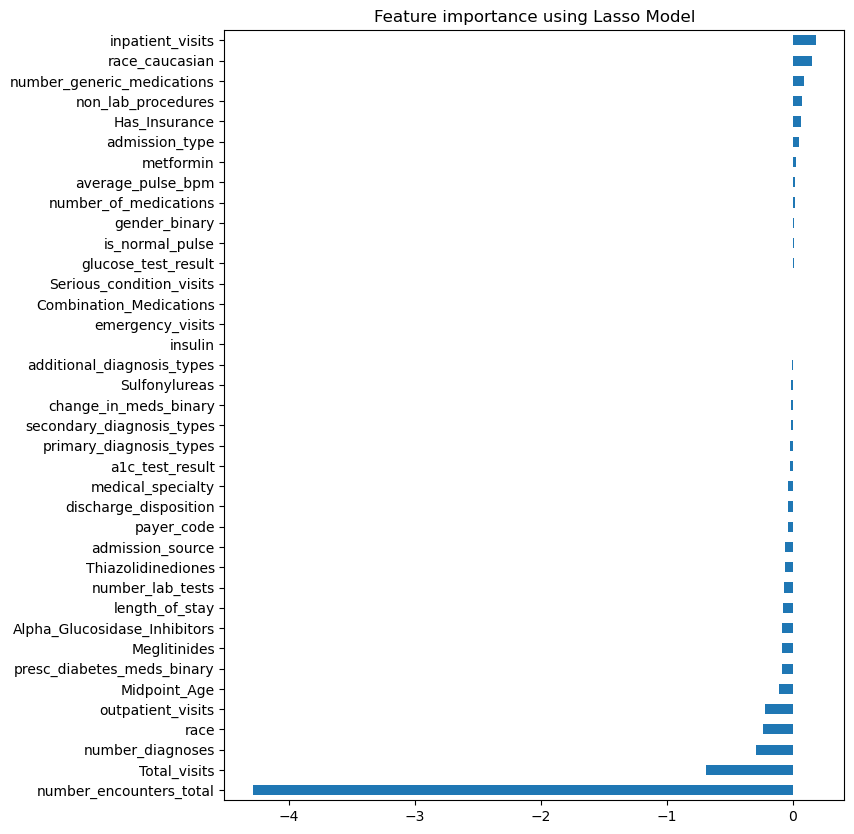

In [278]:
#plot_importance(coef,'Lasso')

Based on the results of Lasso Regression: 
- It removed Combination_Medications, emergency_visits , Serious_condition_visits
- Other variables like is_normal_pulse, glucose_test_result have a corr < 0.001   
- Other variables like additional_diagnosis_types, insulin have a corr between 0 and - 0.001 

### Ridge Regression (Embedded Methods)

In [279]:
#ridge = RidgeCV()
#ridge.fit(X_multiclass_minmax, y_multiclass)

RidgeCV()

In [280]:
#ridge_coef_reshaped = ridge.coef_.reshape(-1)
#coef = pd.Series(ridge_coef_reshaped, index=X_combined.columns)

In [281]:
#print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 38 variables and eliminated the other 0 variables


In [282]:
#coef.sort_values(ascending=False)

race_caucasian                  0.160652
inpatient_visits                0.149314
number_generic_medications      0.116216
non_lab_procedures              0.068654
Has_Insurance                   0.064940
admission_type                  0.046693
metformin                       0.022000
average_pulse_bpm               0.020667
number_of_medications           0.018528
gender_binary                   0.010472
is_normal_pulse                 0.006809
glucose_test_result             0.004818
Combination_Medications        -0.004695
additional_diagnosis_types     -0.006301
insulin                        -0.006644
change_in_meds_binary          -0.014574
secondary_diagnosis_types      -0.017315
Sulfonylureas                  -0.021871
primary_diagnosis_types        -0.025244
a1c_test_result                -0.025412
medical_specialty              -0.038808
discharge_disposition          -0.040222
payer_code                     -0.042072
admission_source               -0.061942
number_lab_tests

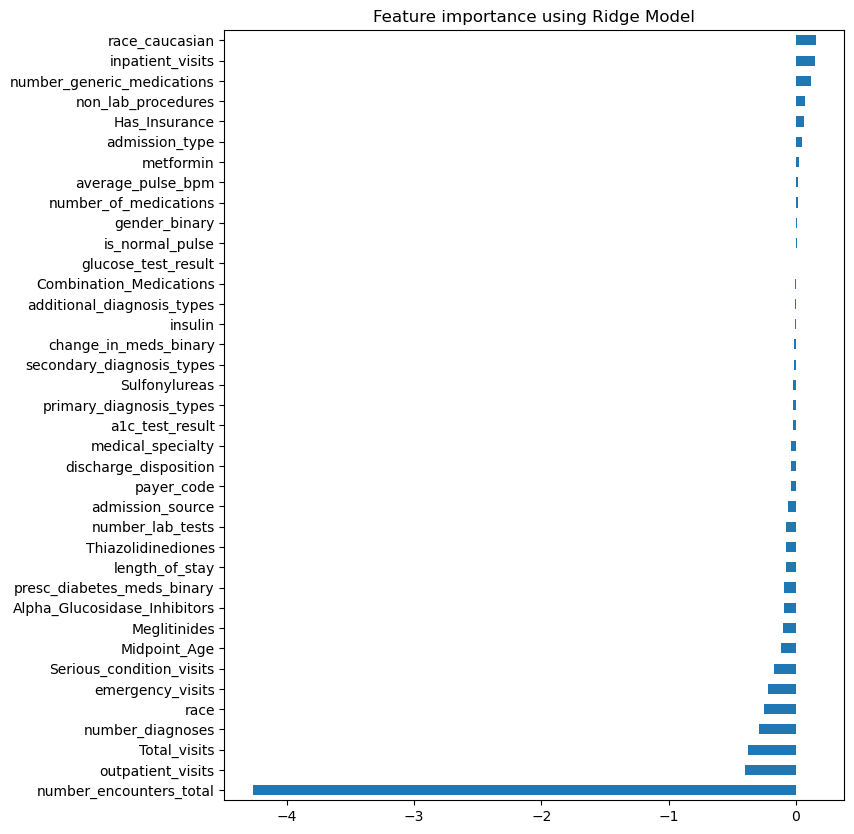

In [283]:
#plot_importance(coef, "Ridge")

results: is_normal_pulse, glucose_test_result, Combination_Medications, additional_diagnosis_types, insulin  are almost zero, so we can consider them as good candidates for features to remove

### Analysis of Variance for Categorical Variables, or ANOVA-C

In [284]:
#X_multiclass_non_metric.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'primary_diagnosis_types',
       'secondary_diagnosis_types', 'additional_diagnosis_types',
       'glucose_test_result', 'a1c_test_result', 'race_caucasian', 'insulin',
       'metformin', 'Sulfonylureas', 'Meglitinides', 'Thiazolidinediones',
       'Alpha_Glucosidase_Inhibitors', 'Combination_Medications',
       'gender_binary', 'presc_diabetes_meds_binary', 'change_in_meds_binary',
       'Has_Insurance', 'is_normal_pulse'],
      dtype='object')

### Phik Correlation Matrix (Correlation between categorical variables)

interval columns not set, guessing: ['race', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis_types', 'secondary_diagnosis_types', 'additional_diagnosis_types', 'glucose_test_result', 'a1c_test_result', 'race_caucasian', 'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides', 'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors', 'Combination_Medications', 'gender_binary', 'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance', 'is_normal_pulse']


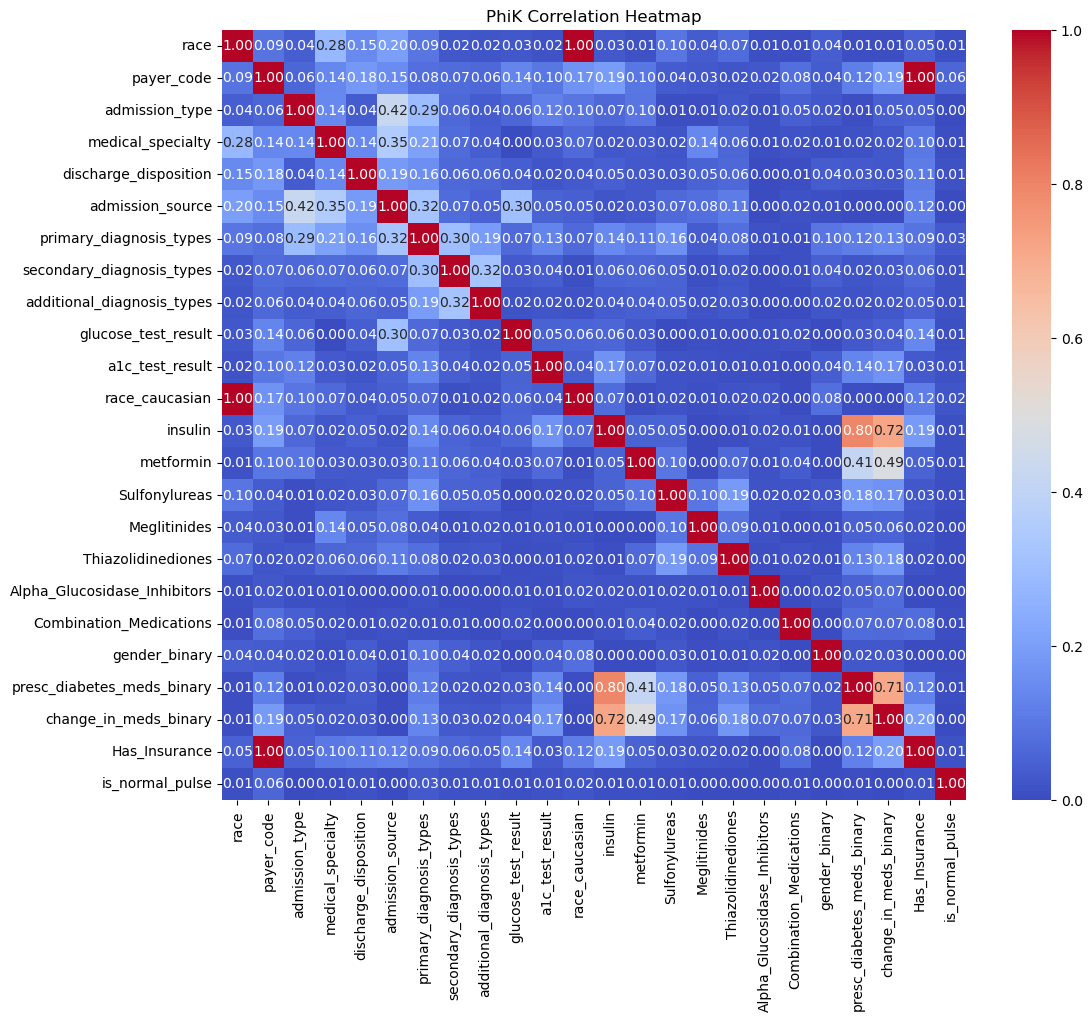

In [285]:
#phik_corr_matrix = X_multiclass_non_metric.phik_matrix()

# Plotting a heatmap for the PhiK correlation matrix
#plt.figure(figsize=(12, 10))
#sns.heatmap(phik_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('PhiK Correlation Heatmap')
#plt.show()

In [286]:
#pd.set_option('display.max_columns', None)
#phik_corr_matrix[phik_corr_matrix>0.5]

race  payer_code  admission_type  \
race                           1.0         NaN             NaN   
payer_code                     NaN         1.0             NaN   
admission_type                 NaN         NaN             1.0   
medical_specialty              NaN         NaN             NaN   
discharge_disposition          NaN         NaN             NaN   
admission_source               NaN         NaN             NaN   
primary_diagnosis_types        NaN         NaN             NaN   
secondary_diagnosis_types      NaN         NaN             NaN   
additional_diagnosis_types     NaN         NaN             NaN   
glucose_test_result            NaN         NaN             NaN   
a1c_test_result                NaN         NaN             NaN   
race_caucasian                 1.0         NaN             NaN   
insulin                        NaN         NaN             NaN   
metformin                      NaN         NaN             NaN   
Sulfonylureas                  NaN         NaN             NaN   
Meglitinides                   NaN         NaN             NaN   
Thiazolidinediones             NaN         NaN             NaN   
Alpha_Glucosidase_Inhibitors   NaN         NaN             NaN   
Combination_Medications        NaN         NaN             NaN   
gender_binary                  NaN         NaN             NaN   
presc_diabetes_meds_binary     NaN         NaN             NaN   
change_in_meds_binary          NaN         NaN             NaN   
Has_Insurance                  NaN         1.0             NaN   
is_normal_pulse                NaN         NaN             NaN   

                              medical_specialty  discharge_disposition  \
race                                        NaN                    NaN   
payer_code                                  NaN                    NaN   
admission_type                              NaN                    NaN   
medical_specialty                           1.0                    NaN   
discharge_disposition                       NaN                    1.0   
admission_source                            NaN                    NaN   
primary_diagnosis_types                     NaN                    NaN   
secondary_diagnosis_types                   NaN                    NaN   
additional_diagnosis_types                  NaN                    NaN   
glucose_test_result                         NaN                    NaN   
a1c_test_result                             NaN                    NaN   
race_caucasian                              NaN                    NaN   
insulin                                     NaN                    NaN   
metformin                                   NaN                    NaN   
Sulfonylureas                               NaN                    NaN   
Meglitinides                                NaN                    NaN   
Thiazolidinediones                          NaN                    NaN   
Alpha_Glucosidase_Inhibitors                NaN                    NaN   
Combination_Medications                     NaN                    NaN   
gender_binary                               NaN                    NaN   
presc_diabetes_meds_binary                  NaN                    NaN   
change_in_meds_binary                       NaN                    NaN   
Has_Insurance                               NaN                    NaN   
is_normal_pulse                             NaN                    NaN   

                              admission_source  primary_diagnosis_types  \
race                                       NaN                      NaN   
payer_code                                 NaN                      NaN   
admission_type                             NaN                      NaN   
medical_specialty                          NaN                      NaN   
discharge_disposition                      NaN                      NaN   
admission_source                           1.0                      NaN   
pri

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are three pairs of variables that are highly correlated:
    - payer_code vs Has_insurance (1.00) 
    - race_caucasian vs race (1.00) 
    - insulin vs presc_diabetes_meds_binary (0.80)
    - insulin vs change_in_meds_binary (0.72)
    - presc_diabetes_meds_binary vs change_in_meds_binary (0.71)    

In [287]:
#X_combined.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'primary_diagnosis_types',
       'secondary_diagnosis_types', 'additional_diagnosis_types',
       'glucose_test_result', 'a1c_test_result', 'race_caucasian', 'insulin',
       'metformin', 'Sulfonylureas', 'Meglitinides', 'Thiazolidinediones',
       'Alpha_Glucosidase_Inhibitors', 'Combination_Medications',
       'gender_binary', 'presc_diabetes_meds_binary', 'change_in_meds_binary',
       'Has_Insurance', 'is_normal_pulse', 'average_pulse_bpm',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses',
       'number_generic_medications', 'outpatient_visits',
       'number_encounters_total', 'emergency_visits', 'inpatient_visits',
       'Midpoint_Age', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR | RFE DT | RFE RF | SFS LR | SFS RF | Lasso | Ridge | Mutual Info | ANova |What to do?| 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Outpatient_visits | Keep | Keep | Discard | Keep | Keep | Keep | Keep | Keep | Discard | Keep | Keep |
| Emergency_visits | Keep | Keep | Discard | Keep | Discard | Keep | Discard | Keep | Keep | Keep | Keep |
| Inpatient_visits | Keep? | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep |  |
| Average_pulse_bpm | Keep | Discard | Discard | Keep | Discard | Keep | Keep | Keep | Discard | Discard | Discard |
| Length_of_stay | Keep | Discard | Discard | Keep | Discard | Keep | Keep | Keep | Discard | Keep | Keep |
| Number_lab_tests | Keep | Discard | Discard | Keep | Discard | Keep | Keep | Keep | Discard | Keep | Keep |
| Non_lab_procedures | Keep | Discard | Discard | Keep | Discard | Keep | Keep | Keep | Discard | Keep | Keep |
| Number_of_medications | Keep | Discard | Discard | Keep | Discard | Keep | Keep | Keep | Discard | Keep | Keep |
| Number_diagnoses | Keep | Discard | Keep | Keep | Discard | Keep | Keep | Keep | Keep | Keep | Keep |
| Number_generic_medications | Keep | Discard | Discard | Keep | Discard | Keep | Keep | Keep | Discard | Keep | Keep |
| Midpoint_Age | Keep | Discard | Discard | Keep | Discard | Keep | Keep | Keep | Discard | Keep | Keep |
| Total_visits | Keep? | Keep | Discard | Keep | Discard | Keep | Keep | Keep | Keep | Keep | Discard |
| Serious_condition_visits | Keep? | Keep | Discard | Keep | Discard | Keep | Discard | Keep | Keep | Keep | Discard|
| Number_encounters_total | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
<hr>


### Categorical Data

| Predictor | Chi-Square | Phik | Lasso | Ridge | Mutual Info | Anova | What to do? |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Race | Keep | Keep? | Keep | Keep | Keep | Keep | Keep |
| Payer_code | Keep | Keep? | Keep | Keep | Keep | Keep | Discard |
| Admission_type | Keep | Keep | Keep | Keep | Discard | Keep | Keep |
| Medical_specialty | Keep | Keep | Keep | Keep | Discard | Keep | Keep |
| Discharge_disposition | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| Admission_source | Keep | Keep | Keep | Keep | Keep | Discard | Keep |
| Primary_diagnosis_types | Keep | Keep | Keep | Keep | Discard | Keep | Keep |
| Secondary_diagnosis_types | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| Additional_diagnosis_types | Keep | Keep | ? | ? | Discard | Keep | Keep |
| Glucose_test_result | Keep | Keep | ? | ? | Keep| Discard | Discard |
| A1c_test_result | Keep | Keep | Keep | Keep | Keep | Discard | Keep |
| Race_caucasian | Keep | Keep? | Keep | Keep | Keep | Discard | Discard |
| Insulin | Keep | Keep? | ? | ? | Keep | Keep | Discard |
| Metformin | Keep | Keep | Keep | Keep | Keep | Discard | Keep |
| Sulfonylureas | Keep | Keep | Keep | Keep | Discard | Discard | Keep |
| Meglitinides | Keep | Keep | Keep | Keep | Discard | Keep | Keep |
| Thiazolidinediones | Keep | Keep | Keep | Keep | Discard | Keep | Keep |
| Alpha_Glucosidase_Inhibitors | Keep | Keep | Keep | Keep | Discard | Keep | Keep |
| Combination_Medications | Discard | Keep | Discard | Keep | Discard | Discard | Discard |
| Gender_binary | Keep | Keep | Keep | Keep | Discard | Keep | Keep |
| Presc_diabetes_meds_binary | Keep | Keep? | Keep | Keep | Discard | Keep | Discard |
| Change_in_meds_binary | Keep | Keep? | Keep | Keep | Discard | Keep | Keep |
| Has_Insurance | Keep | Keep | Keep? | Keep | Discard | Discard | Keep |
| Is_normal_pulse | Discard | Keep | ? | ? | Discard | Discard | Discard |



<hr>

## Final result (Features choosen)

In [381]:
selected_features = ['race',
                     'admission_type',
                     'medical_specialty',
                     'discharge_disposition',
                     'admission_source',
                     'primary_diagnosis_types',
                     'secondary_diagnosis_types',
                     'additional_diagnosis_types',
                     'a1c_test_result',
                     'metformin',
                     'Sulfonylureas',
                     'Meglitinides',
                     'Thiazolidinediones',
                     'Alpha_Glucosidase_Inhibitors',
                     'gender_binary',
                     'change_in_meds_binary',
                     'Has_Insurance',
                     'length_of_stay',
                     'number_lab_tests',
                     'non_lab_procedures',
                     'number_of_medications',
                     'number_diagnoses',
                     'number_generic_medications',
                     'outpatient_visits',
                     'number_encounters_total',
                     'emergency_visits',
                     'inpatient_visits',
                     'Midpoint_Age',
                     'Serious_condition_visits']

In [289]:
#len(selected_features)

29

# Normalization Methods

In [290]:
#X_combined.head()

race  payer_code  admission_type  medical_specialty  \
encounter_id                                                         
533253        51779       28201           50779               5217   
426224        12977       28201           50779              34922   
634063        51779       28201            7246               5217   
890610        12977       22683           50779              12561   
654194        51779        4319           13211              34922   

              discharge_disposition  admission_source  \
encounter_id                                            
533253                        51342             40319   
426224                        12978             21586   
634063                        51342              4913   
890610                        51342              4418   
654194                        51342             21586   

              primary_diagnosis_types  secondary_diagnosis_types  \
encounter_id                                                       
533253                          10137                       5746   
426224                           1968                      22345   
634063                           6667                       1358   
890610                           6667                       2897   
654194                           3443                       5866   

              additional_diagnosis_types  glucose_test_result  \
encounter_id                                                    
533253                              5130                67548   
426224                              1297                67548   
634063                             11927                67548   
890610                             21234                67548   
654194                             21234                67548   

              a1c_test_result  race_caucasian  insulin  metformin  \
encounter_id                                                        
533253                  59320               1        0          0   
426224                  59320               0        1          0   
634063                  59320               1        1          0   
890610                  59320               0        0          0   
654194                  59320               1        0          0   

              Sulfonylureas  Meglitinides  Thiazolidinediones  \
encounter_id                                                    
533253                    0             0                   0   
426224                    0             0                   0   
634063                    0             0                   0   
890610                    0             0                   0   
654194                    0             0                   0   

              Alpha_Glucosidase_Inhibitors  Combination_Medications  \
encounter_id                                                          
533253                                   0                        0   
426224                                   0                        0   
634063                                   0                        0   
890610                                   0                        0   
654194                                   0                        0   

              gender_binary  presc_diabetes_meds_binary  \
encounter_id                                              
533253                    0                           0   
426224                    1                           1   
634063                    0                           1   
890610                    1                           0   
654194                    0                           0   

              change_in_meds_binary  Has_Insurance  is_normal_pulse  \
encounter_id                                                          
533253                            0              0                0   
426224                            0              0                0   
634063                            1              0     

In [382]:
X_multiclass = X_combined[selected_features]
#X_multiclass

In [292]:
#X_multiclass.shape

(71236, 29)

In [293]:
# Standard Scaler
#scaler = StandardScaler()
#X_scaled_stand = scaler.fit_transform(X_multiclass)

In [383]:
# Min Max Scaler
min_max_scaler = MinMaxScaler()
X_scaled_minmax = min_max_scaler.fit_transform(X_multiclass)

# Algorithms

### Random Forest

In [89]:
#cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [90]:
#def return_f1score(model, X, y):
#    n_scores = cross_val_score(model, X, y, scoring = 'f1_weighted', cv = cv)
#    return n_scores

In [91]:
#def return_results(models):
#    results, names = [],[]
#    for name, model in models.items():
#        scores = return_f1score(model, X_scaled_minmax, y_multiclass)
#        results.append(scores)
#        names.append(name)
#        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
#    
#    plt.figure(figsize=(15,7))
#    plt.boxplot(results, labels = names, showmeans = True)
#    plt.xticks(fontsize=14)
#    plt.show()

#### The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

>1 0.544 (0.005)
>2 0.550 (0.007)
>4 0.570 (0.006)
>6 0.588 (0.005)
>8 0.605 (0.005)
>10 0.623 (0.004)
>12 0.639 (0.004)
>14 0.650 (0.004)
>16 0.654 (0.005)
>18 0.654 (0.004)
>20 0.651 (0.004)
>None 0.647 (0.004)


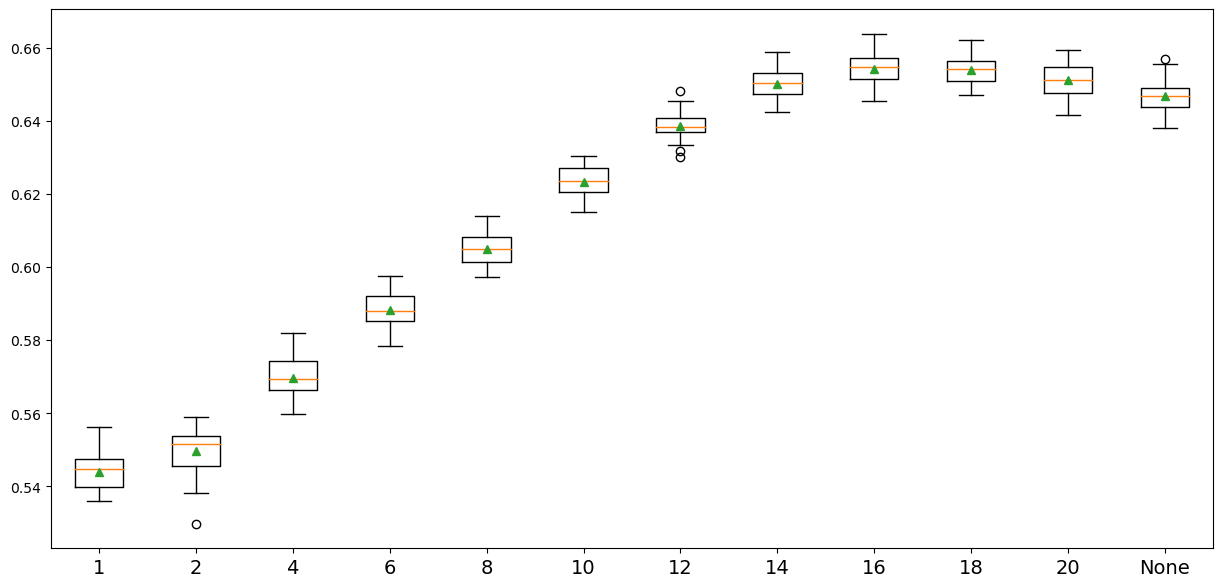

In [92]:
#def get_models(value_depth):
#    models = dict()
#    for value in value_depth:
#        models[str(value)] = RandomForestClassifier(class_weight='balanced', max_depth=value, random_state=19)      
#    return models
#
#models = get_models([1,2,4,6,8,10,12,14,16,18,20,None])
#return_results(models)

Since max_depth=18 was the best depth, we are going to use it in the next visualizations, both for performance and time (not use the default max_depth=None).

#### Number of estimators (The number of trees in the forest)

>10 0.636 (0.005)
>20 0.647 (0.004)
>50 0.652 (0.004)
>100 0.654 (0.004)
>200 0.653 (0.004)
>300 0.654 (0.004)
>400 0.654 (0.004)
>500 0.654 (0.004)


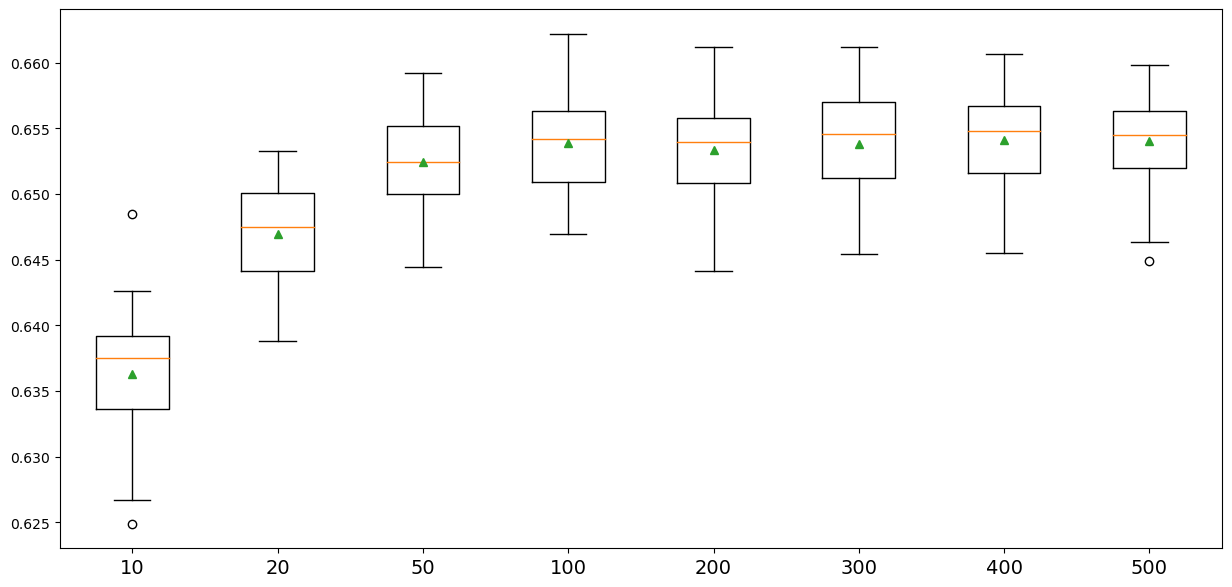

In [93]:
#def get_models(value_estimators):
#    models = dict()
#    for value in value_estimators:
#        models[str(value)] = RandomForestClassifier(n_estimators=value,max_depth=18,class_weight='balanced',random_state=19)      
#    return models
#
#models = get_models([10,20,50,100,200,300,400,500])
#return_results(models)

We can see that after 100 estimators (the default value) it does not improve the score significantly. Having said that, estimators are normally a good parameter to optimize (increase the number) when you have overfitting (for example, when the score in test/kaggle is much lower than on the training).

#### Bootstrap (Whether or not bootstrap samples are used when builiding trees. If False, then the whole dataset is used to build each tree)

>True 0.654 (0.004)
>False 0.654 (0.004)


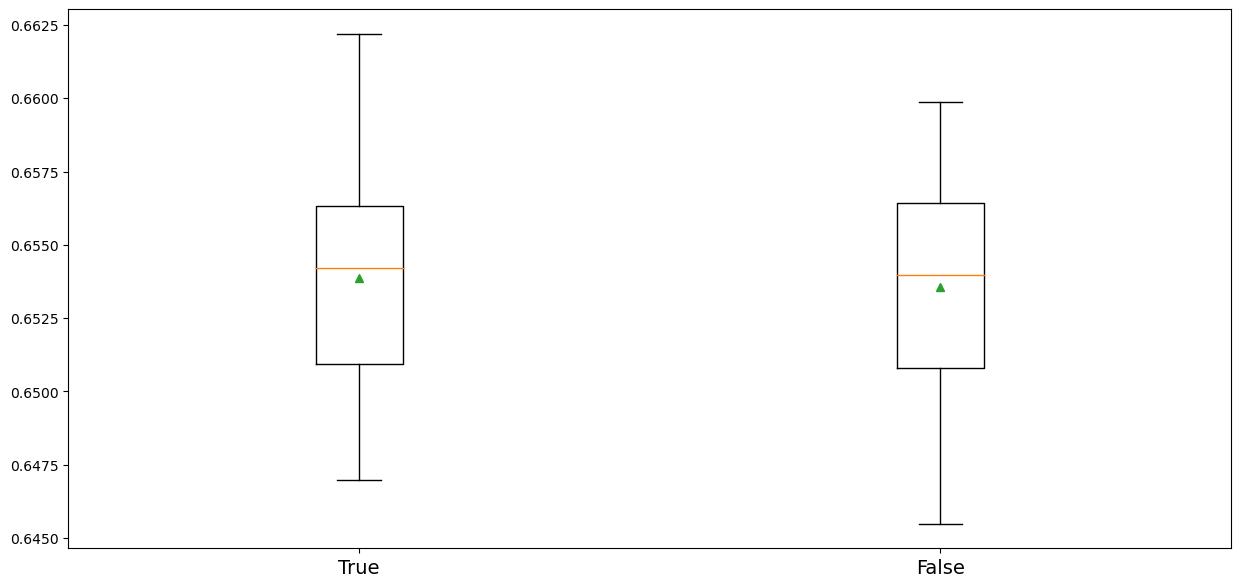

In [94]:
#def get_models(value_bootstrap):
#    models = dict()
#    for value in value_bootstrap:
#        models[str(value)] = RandomForestClassifier(bootstrap=value,max_depth=18,class_weight='balanced',random_state=19)      
#    return models

#models = get_models([True,False])
#return_results(models)

#### Max Samples : If bootstrap is True, the number of samples to draw from X to train each base estimator.

>0.2 0.647 (0.004)
>0.4 0.650 (0.003)
>0.6 0.652 (0.005)
>0.8 0.653 (0.004)
>None 0.654 (0.004)


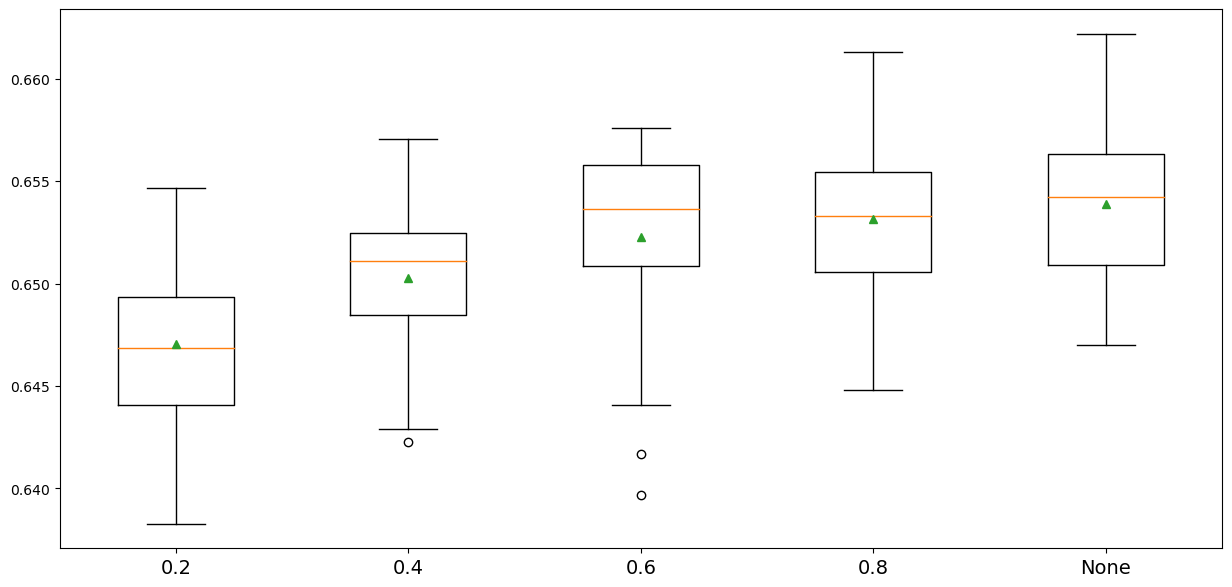

In [95]:
#def get_models(value_samples):
#    models = dict()
#    for value in value_samples:
#        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=18,max_samples=value, random_state=19)      
#    return models

#models = get_models([0.2,0.4,0.6,0.8,None])
#return_results(models)

>2 0.654 (0.004)
>10 0.656 (0.004)
>25 0.652 (0.004)
>50 0.644 (0.004)
>100 0.634 (0.004)
>200 0.621 (0.005)
>300 0.615 (0.004)
>400 0.609 (0.004)
>500 0.605 (0.004)


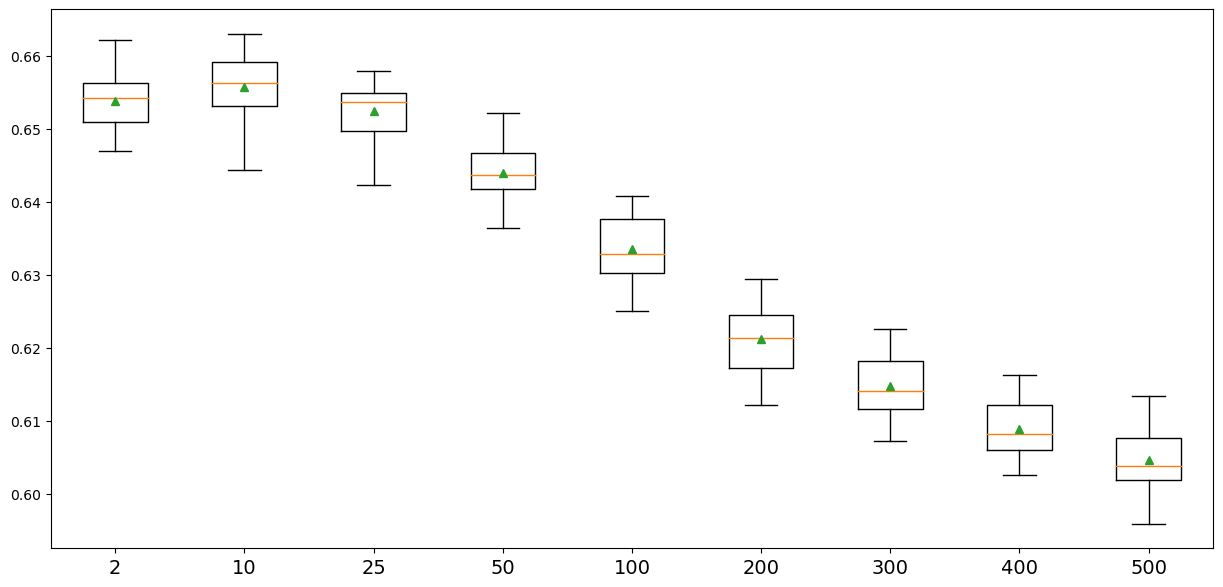

In [96]:
#def get_models(value_samples):
#    models = dict()
#    for value in value_samples:
#        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=18,min_samples_split=value, random_state=19)      
#    return models

#models = get_models([2,10,25,50,100,200,300,400,500])
#return_results(models)

>2 0.654 (0.004)
>10 0.648 (0.005)
>25 0.632 (0.004)
>50 0.617 (0.004)
>100 0.604 (0.004)
>200 0.593 (0.005)
>300 0.589 (0.005)
>400 0.585 (0.005)
>500 0.582 (0.005)


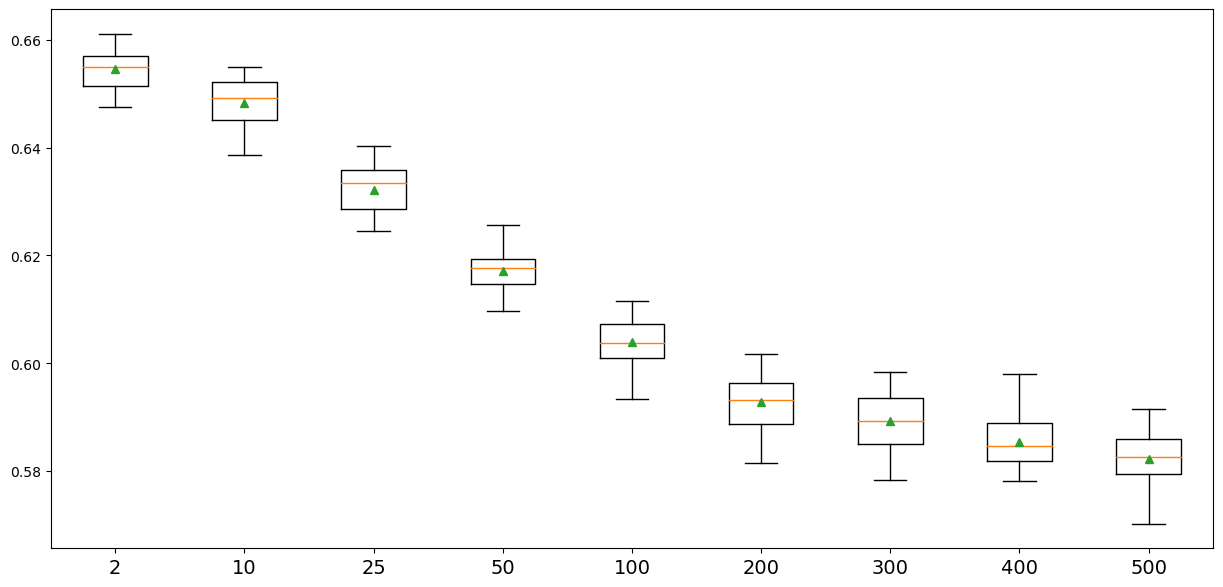

In [97]:
#def get_models(value_samples):
#    models = dict()
#    for value in value_samples:
#        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=18,min_samples_leaf=value, random_state=19)      
#    return models

#models = get_models([2,10,25,50,100,200,300,400,500])
#return_results(models)

>gini 0.654 (0.004)
>entropy 0.653 (0.004)
>log_loss 0.653 (0.004)


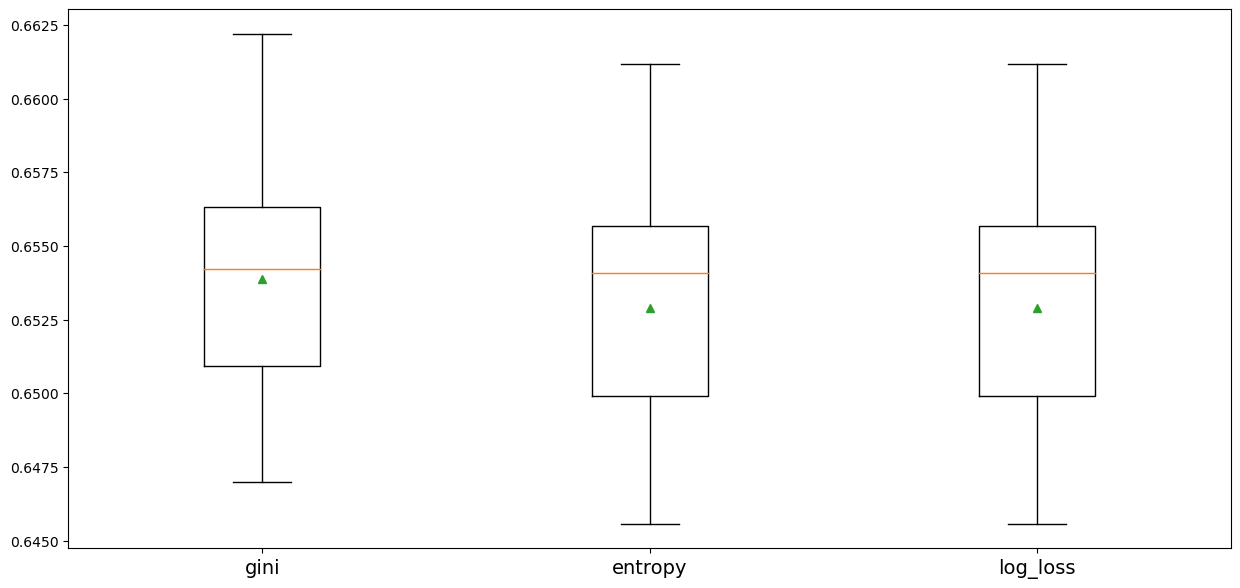

In [98]:
#def get_models(value_samples):
#    models = dict()
#    for value in value_samples:
#        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=18,criterion=value, random_state=19)      
#    return models

#models = get_models(['gini', 'entropy', 'log_loss'])
#return_results(models)

>sqrt 0.654 (0.004)
>log2 0.653 (0.004)
>None 0.651 (0.005)


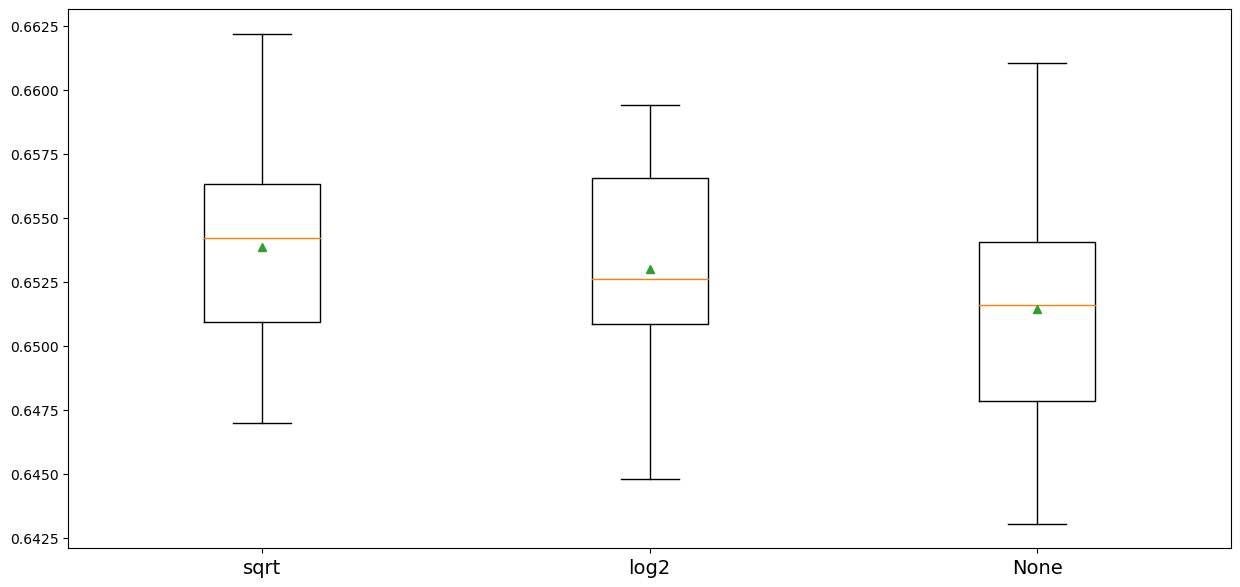

In [99]:
#def get_models(value_samples):
#    models = dict()
#    for value in value_samples:
#        models[str(value)] = RandomForestClassifier(class_weight='balanced',max_depth=18,max_features=value, random_state=19)      
#    return models

#models = get_models(['sqrt', 'log2', None])
#return_results(models)

### AdaBoostClassifier

>1 0.637 (0.004)
>2 0.649 (0.005)
>3 0.651 (0.005)
>4 0.649 (0.004)
>5 0.644 (0.005)
>6 0.633 (0.005)


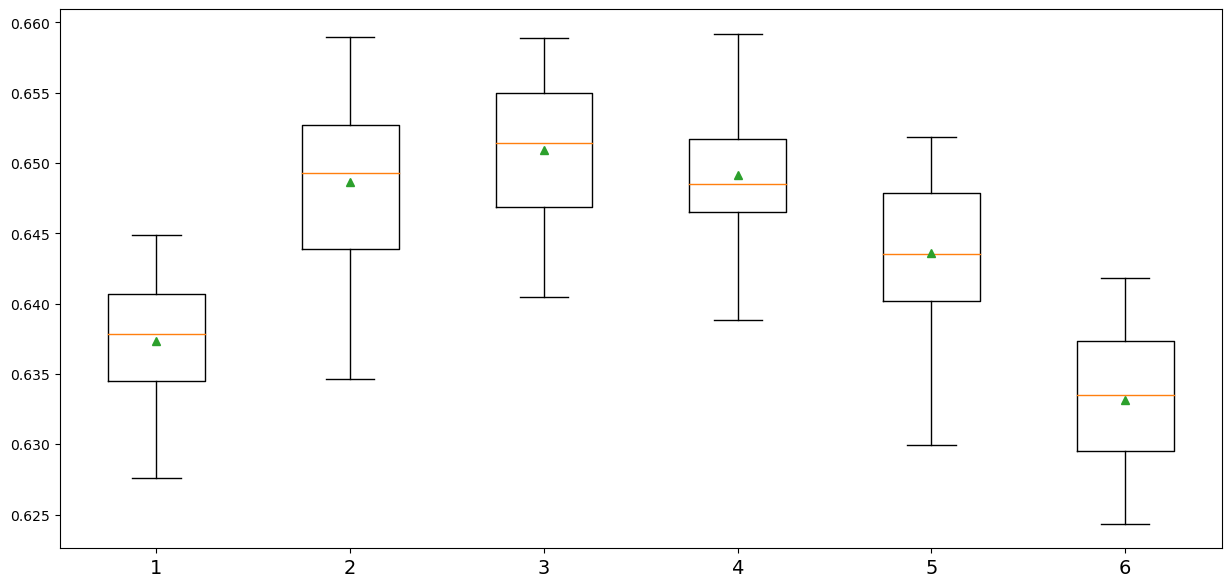

In [182]:
#def get_models(values):
#    models = dict()
#    for value in values:
#        models[str(value)] = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=value), random_state = 15)      
#    return models

#models = get_models([1,2,3,4,5,6])
#return_results(models)

>ad_LR 0.437 (0.003)
>ad_def 0.637 (0.004)


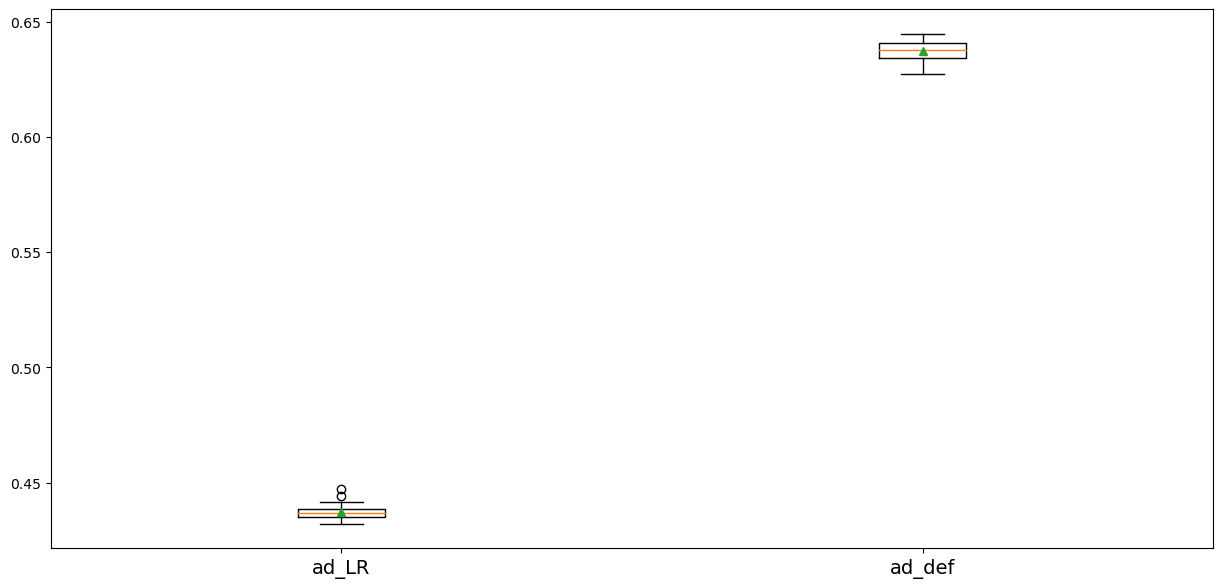

In [183]:
#def get_models():
#    models = dict()
#    models['ad_LR'] = AdaBoostClassifier(estimator = LogisticRegression(max_iter=500), random_state = 15)  
#    models['ad_def'] = AdaBoostClassifier(random_state = 15)  
#    return models

#models = get_models()
#return_results(models)

>2 0.622 (0.004)
>5 0.626 (0.004)
>10 0.629 (0.004)
>20 0.631 (0.004)
>30 0.634 (0.004)
>50 0.637 (0.004)
>100 0.638 (0.005)
>150 0.638 (0.005)


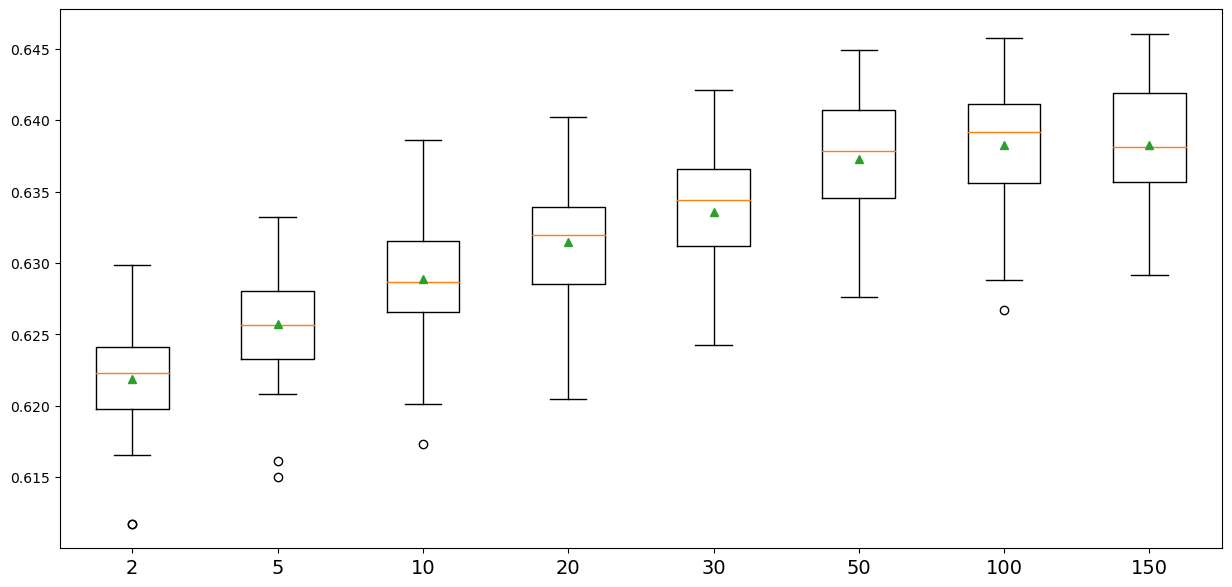

In [184]:
#def get_models(values):
#    models = dict()
#    for value in values:
#        models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 15)      
#    return models

#models = get_models([2,5,10,20,30,50,100,150])
#return_results(models)

>0.1 0.625 (0.004)
>0.2 0.627 (0.005)
>0.3 0.628 (0.004)
>0.4 0.630 (0.004)
>0.5 0.631 (0.004)
>0.6 0.632 (0.004)
>0.7 0.634 (0.005)
>0.8 0.636 (0.005)
>0.9 0.636 (0.004)
>1.0 0.637 (0.004)


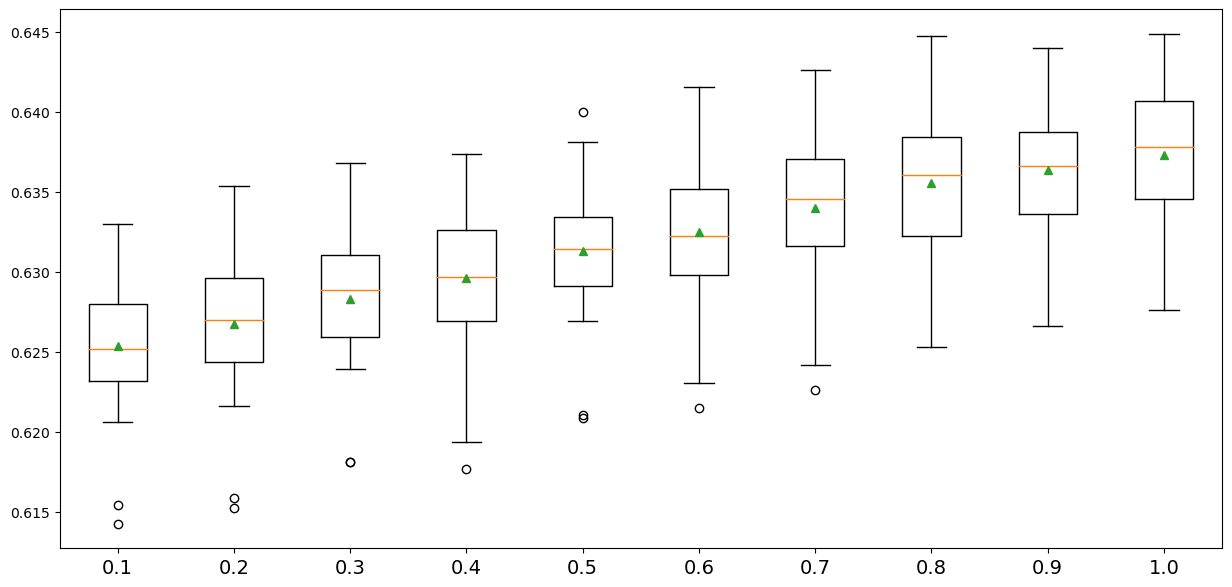

In [185]:
#def get_models(values):
#    models = dict()
#    for value in values:
#        models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 15)      
#    return models

#models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#return_results(models)

>0.1 0.628 (0.004)
>0.2 0.631 (0.004)
>0.3 0.634 (0.004)
>0.4 0.636 (0.004)
>0.5 0.637 (0.004)
>0.6 0.638 (0.004)
>0.7 0.638 (0.004)
>0.8 0.638 (0.004)
>0.9 0.638 (0.004)
>1.0 0.638 (0.005)


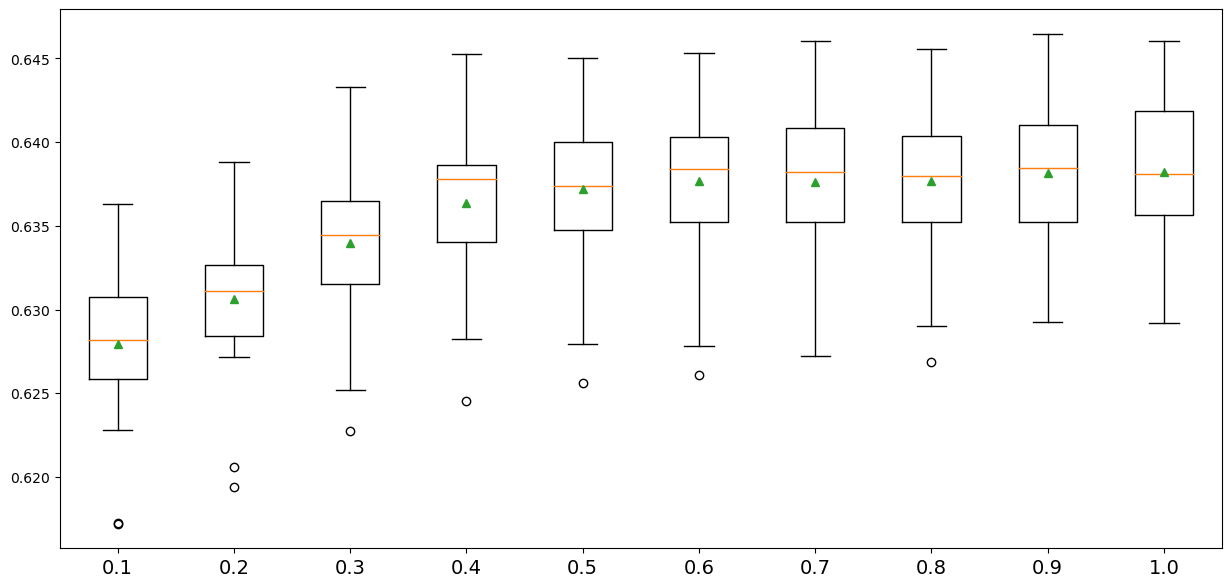

In [190]:
#def get_models(values):
#    models = dict()
#    for value in values:
#        models[str(value)] = AdaBoostClassifier(learning_rate = value, n_estimators = 150, random_state = 15)      
#    return models

#models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#return_results(models)

>SAMME 0.628 (0.005)
>SAMME.R 0.637 (0.004)


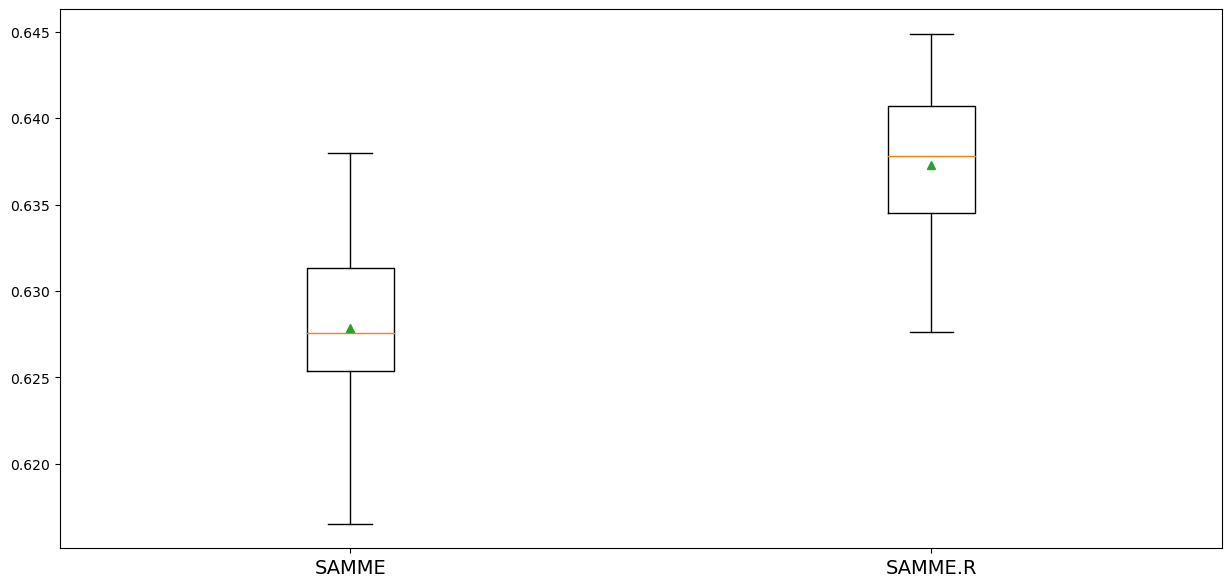

In [187]:
#def get_models(values):
#    models = dict()
#    for value in values:
#        models[str(value)] = AdaBoostClassifier(algorithm = value, random_state = 15)      
#    return models

#models = get_models(["SAMME","SAMME.R"])
#return_results(models)

### GradientBoosting

>0.001 0.378 (0.000)
>0.01 0.628 (0.004)
>0.1 0.649 (0.004)
>0.3 0.653 (0.004)
>0.5 0.654 (0.004)
>0.8 0.653 (0.005)
>1.0 0.653 (0.005)


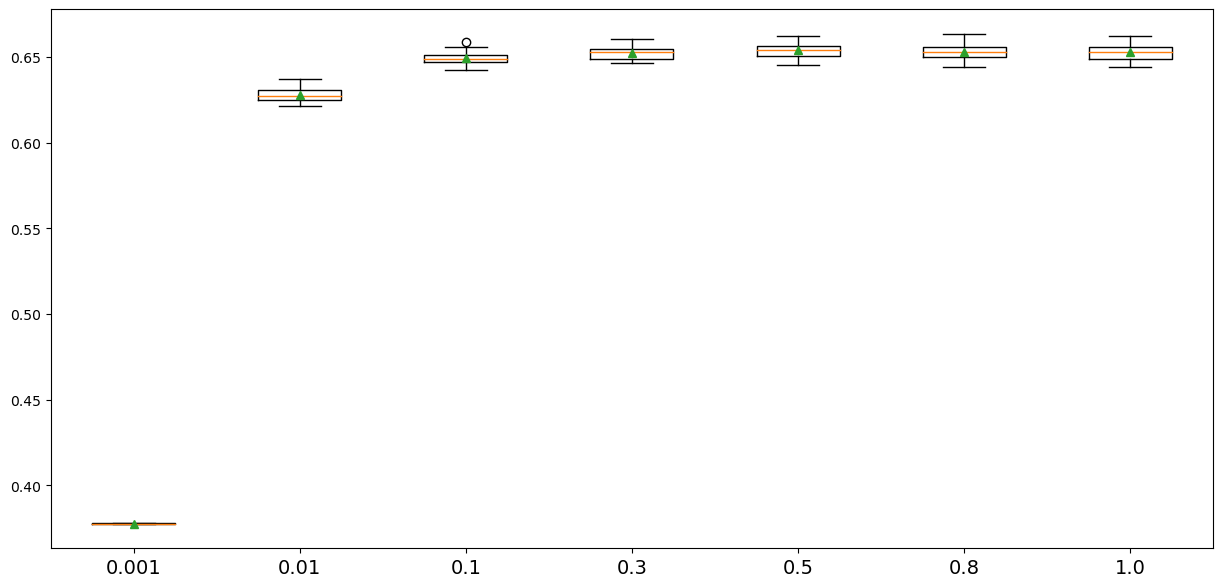

In [302]:
#def get_models(values):
#    models = dict()
#    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
#    return models
#
#models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
#return_results(models)

>2 0.378 (0.000)
>5 0.626 (0.004)
>10 0.628 (0.004)
>20 0.631 (0.004)
>30 0.637 (0.004)
>50 0.645 (0.004)
>100 0.649 (0.004)
>150 0.651 (0.004)
>200 0.651 (0.004)
>500 0.654 (0.004)


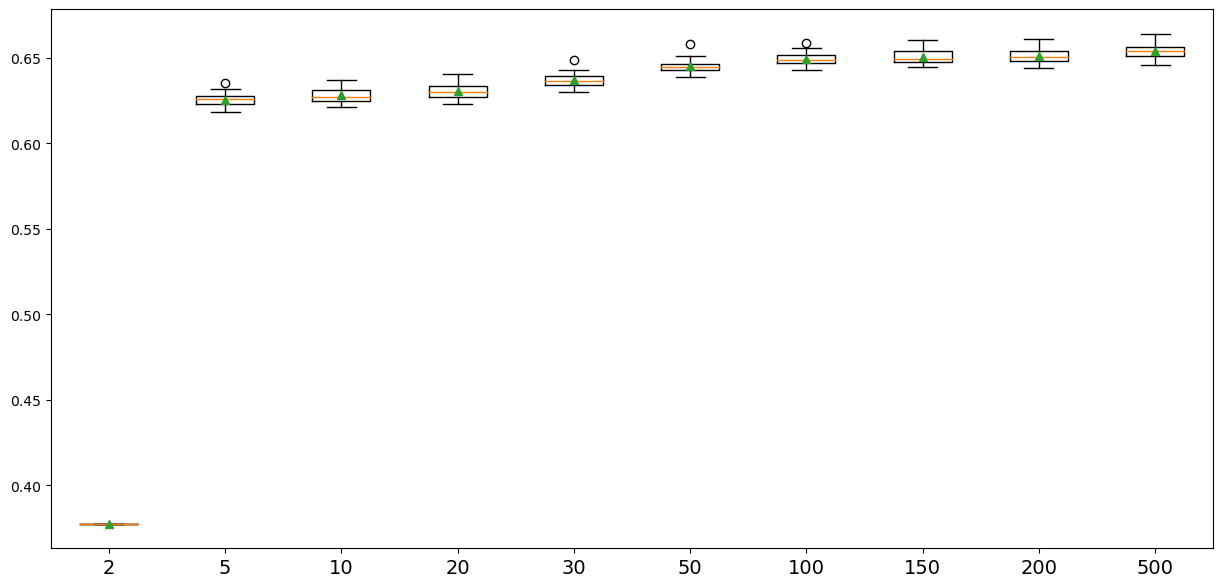

In [304]:
#def get_models(values):
#    models = dict()
#    for value in values:
#        models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 15)      
#    return models

#models = get_models([2,5,10,20,30,50,100,150,200,500])
#return_results(models)

>0.2 0.649 (0.004)
>0.4 0.650 (0.004)
>0.6 0.650 (0.004)
>0.8 0.650 (0.004)
>1.0 0.649 (0.004)


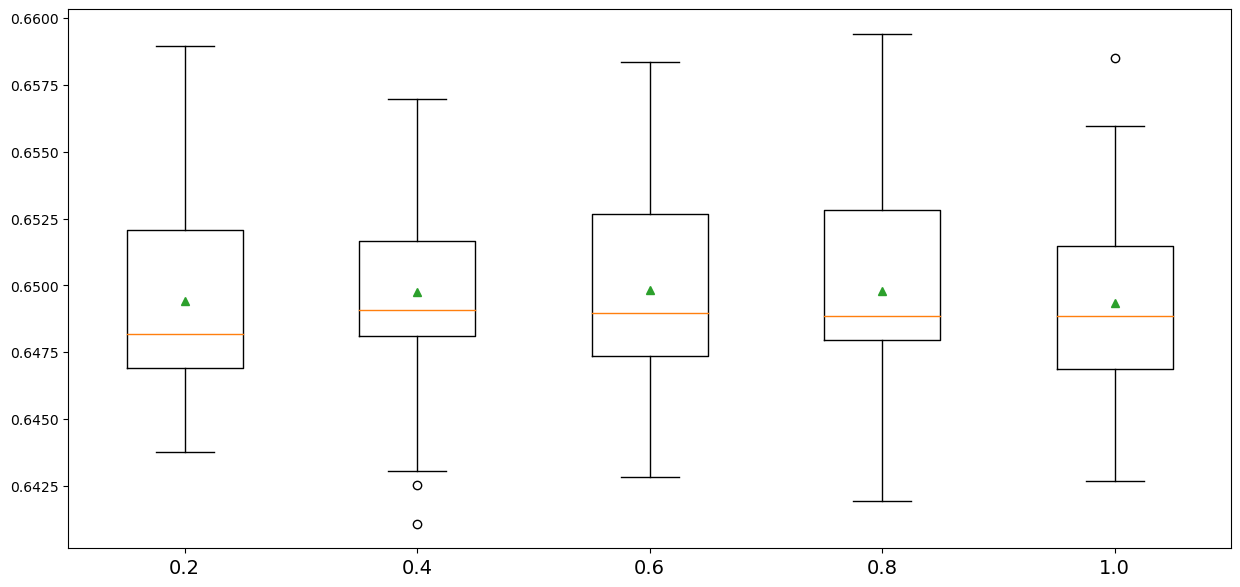

In [305]:
#def get_models(values):
#    models = dict()
#    for value in values:
#        models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 15)      
#    return models

#models = get_models([0.2,0.4,0.6,0.8,1.0])
#return_results(models)

>2 0.632 (0.004)
>0.5 0.650 (0.004)
>sqrt 0.644 (0.004)
>log2 0.643 (0.004)
>None 0.649 (0.004)


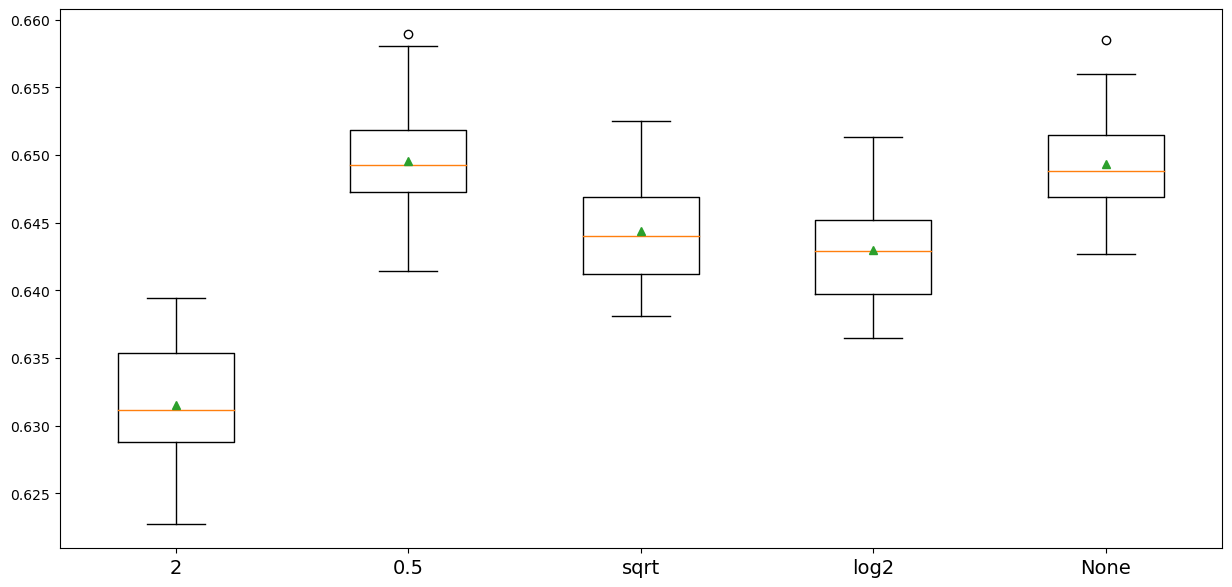

In [306]:
#def get_models(values):
#    models = dict()
#    for value in values:
#        models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 15)      
#    return models

#models = get_models([2,0.5,'sqrt','log2',None])
#return_results(models)

learning rate = 0.5
n_extimators = 500
subsample = 0.6
max features = 0.5

# Randomized Search

### Randomized Search - HistGradientBoostingClassifier, AdaBoostClassifier

In [ ]:
#hist_gb_pipeline = Pipeline([('hist_gb', HistGradientBoostingClassifier(random_state=19))])
#adaboost_pipeline = Pipeline([('adaboost', AdaBoostClassifier(random_state=19))])

# List of models and their respective pipelines
#models = [
#    ('Hist Gradient Boosting', hist_gb_pipeline),
#    ('Ada Gradient Boosting', adaboost_pipeline)
#]

# Define the hyperparameter distributions for each model
#hyperparameter_dists = [
#    {
#        'hist_gb__learning_rate': np.logspace(-4, 0, num=1000), 
#        'hist_gb__max_depth': range(3, 21),
#        'hist_gb__max_iter': range(50, 500),
#        'hist_gb__min_samples_leaf': range(1, 20),
#        'hist_gb__max_leaf_nodes': range(10, 50),
#        'hist_gb__l2_regularization': np.logspace(-6, 1, num=1000)  
#    },  # Hist Gradient Boosting
    
#    {
#        'adaboost__n_estimators': range(50, 200),
#        'adaboost__learning_rate': [0.8,0.9,1.0],
#        'adaboost__algorithm': ["SAMME.R"],
#        'adaboost__max_deph': range(1,9)
#    }  # Ada Gradient Boosting
#    
#
#]
#
#cv_results_dfs = []
#results = []

# Loop over each model and its hyperparameter distribution
#for (model_name, pipeline), param_dist in zip(models, hyperparameter_dists):
    
#    rs = RandomizedSearchCV(pipeline, param_distributions=param_dist, scoring='f1_weighted', cv=10, n_iter=50, verbose=10)

    # Fit RandomizedSearchCV
#    rs.fit(X_scaled_minmax, y_multiclass)

    # Append the best score and best parameters to the results list
#    results.append([model_name, rs.best_score_, rs.best_params_])
    
#    cv_results_df = pd.DataFrame(rs.cv_results_)
#    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
#test_scores_random_search3 = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Parameters'])
#test_scores_random_search3 = test_scores_random_search3.sort_values('Best Score', ascending=False)

In [ ]:
#test_scores_random_search3

In [124]:
#print(test_scores_random_search3['Best Parameters'][0])
#print(test_scores_random_search3['Best Parameters'][1])

{'hist_gb__min_samples_leaf': 15, 'hist_gb__max_leaf_nodes': 37, 'hist_gb__max_iter': 389, 'hist_gb__max_depth': 3, 'hist_gb__learning_rate': 0.22250887981283693, 'hist_gb__l2_regularization': 0.00014162866162991988}
{'adaboost__n_estimators': 112, 'adaboost__learning_rate': 0.7175560918936928}


In [164]:
#print(test_scores_random_search3['Best Score'][0])
#print(test_scores_random_search3['Best Score'][1])

0.6533587371890854
0.6375437354925839


### Randomized Search - DecisionTreeClassifier, KNeighborsClassifier

In [117]:
#models = [
#    DecisionTreeClassifier(random_state=19),
#    KNeighborsClassifier(),
#]

# Define the hyperparameters for each model
#hyperparameters = [
#    {
#        'criterion': ['gini', 'entropy'],
#        'splitter': ['best'],
#        'max_depth': range(1, 10),
#        'min_samples_split': range(20, 201),
#        'min_samples_leaf': range(5, 101)
#    },  # Decision Tree
#    {
#        'n_neighbors': range(75, 201),
#        'weights': ['uniform', 'distance'],
#        'algorithm': ['auto','ball_tree'],
#    },  # K Nearest Neighbors
#]


# Initialize an empty list to store the results
#results = []
#cv_results_dfs = []

# Loop over each model
#for model, params in zip(models, hyperparameters):
    # Initialize RandomizedSearchCV
#    rs = RandomizedSearchCV(model, param_distributions=params, cv=10, n_iter=50, scoring='f1_weighted', verbose=10)
    
    # Fit RandomizedSearchCV
#    rs.fit(X_scaled_minmax, y_multiclass)
    
    # Append the best score and best parameters to the results list
#    results.append([rs.best_score_, rs.best_params_])
    
#    cv_results_df = pd.DataFrame(rs.cv_results_)
#    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
#test_scores_df1 = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_df1 = test_scores_df.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START criterion=gini, max_depth=2, min_samples_leaf=13, min_samples_split=129, splitter=best
[CV 1/10; 1/50] END criterion=gini, max_depth=2, min_samples_leaf=13, min_samples_split=129, splitter=best;, score=0.618 total time=   0.1s
[CV 2/10; 1/50] START criterion=gini, max_depth=2, min_samples_leaf=13, min_samples_split=129, splitter=best
[CV 2/10; 1/50] END criterion=gini, max_depth=2, min_samples_leaf=13, min_samples_split=129, splitter=best;, score=0.614 total time=   0.1s
[CV 3/10; 1/50] START criterion=gini, max_depth=2, min_samples_leaf=13, min_samples_split=129, splitter=best
[CV 3/10; 1/50] END criterion=gini, max_depth=2, min_samples_leaf=13, min_samples_split=129, splitter=best;, score=0.623 total time=   0.1s
[CV 4/10; 1/50] START criterion=gini, max_depth=2, min_samples_leaf=13, min_samples_split=129, splitter=best
[CV 4/10; 1/50] END criterion=gini, max_depth=2, min_samples_leaf=13, min_samples

NameError: name 'test_scores_df' is not defined

In [120]:
#test_scores_df1 = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_df1 = test_scores_df1.sort_values('best_score', ascending=False)

#test_scores_df1

best_score                                        best_params
0    0.644463  {'splitter': 'best', 'min_samples_split': 59, ...
1    0.471152  {'weights': 'uniform', 'n_neighbors': 75, 'alg...

In [122]:
#print(test_scores_df1['best_params'][0])
#print(test_scores_df1['best_params'][1])

{'splitter': 'best', 'min_samples_split': 59, 'min_samples_leaf': 54, 'max_depth': 9, 'criterion': 'gini'}
{'weights': 'uniform', 'n_neighbors': 75, 'algorithm': 'auto'}


In [163]:
#print(test_scores_df1['best_score'][0])
#print(test_scores_df1['best_score'][1])

0.6444634112432582
0.47115233173923327


### Randomized Search - Gradient Boosting, Bernoulli, Gaussian, MLP

In [158]:
#models = {
#    'Gradient Boosting': GradientBoostingClassifier(random_state=19),
#    'Bernoulli Naive Bayes': BernoulliNB(),
#    'Gaussian Naive Bayes': GaussianNB(),
#    'MLP': MLPClassifier(random_state=19)
#}


#hyperparameters = {
#    'Gradient Boosting': {
#        'n_estimators': np.arange(5, 301, 5),
#        'max_depth': np.arange(2, 12),
#        'min_samples_split': np.arange(2, 150),
#        'min_samples_leaf': np.arange(2, 150),
#        'learning_rate': [0.01],
#        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#    },
#    'Bernoulli Naive Bayes': {
#        'alpha': np.logspace(-4, 4, 100),
#        'binarize': np.linspace(0.0, 1.0, 100)
#    },
#    'Gaussian Naive Bayes': {},
#    'MLP': {
#        'hidden_layer_sizes': [(10,), (20,), (30,)],
#        'activation': ['tanh', 'relu'],
#        'solver': ['sgd', 'adam'],
#        'learning_rate': ['constant', 'invscaling', 'adaptive'],
#        'alpha': np.logspace(-4, 4, 100),
#        'learning_rate_init': np.logspace(-4, 0, 100),
#        'max_iter': np.arange(100, 300),
#        'batch_size': np.arange(50, 150)
#    }
#}

# Perform RandomizedSearchCV for each model
#results = []
#cv_results_list4 = []

#for model_name, model in models.items():
#    hyperparameter_dist = hyperparameters[model_name]

#    rs = RandomizedSearchCV(model, param_distributions=hyperparameter_dist, cv=10, n_iter=10, scoring='f1_weighted', verbose=3)
#    rs.fit(X_scaled_minmax, y_multiclass)

#    results.append([model_name, rs.best_score_, rs.best_params_])
    
#    cv_results_df = pd.DataFrame(rs.cv_results_)
#    cv_results_list4.append(cv_results_df)

# Create a DataFrame from the results
#results_df4 = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Params'])
#results_df4 = results_df4.sort_values('Best Params', ascending=False)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END learning_rate=0.01, max_depth=8, min_samples_leaf=29, min_samples_split=108, n_estimators=65, subsample=0.7;, score=0.625 total time=  23.7s
[CV 2/10] END learning_rate=0.01, max_depth=8, min_samples_leaf=29, min_samples_split=108, n_estimators=65, subsample=0.7;, score=0.627 total time=  23.7s
[CV 3/10] END learning_rate=0.01, max_depth=8, min_samples_leaf=29, min_samples_split=108, n_estimators=65, subsample=0.7;, score=0.630 total time=  23.7s
[CV 4/10] END learning_rate=0.01, max_depth=8, min_samples_leaf=29, min_samples_split=108, n_estimators=65, subsample=0.7;, score=0.626 total time=  23.7s
[CV 5/10] END learning_rate=0.01, max_depth=8, min_samples_leaf=29, min_samples_split=108, n_estimators=65, subsample=0.7;, score=0.633 total time=  23.7s
[CV 6/10] END learning_rate=0.01, max_depth=8, min_samples_leaf=29, min_samples_split=108, n_estimators=65, subsample=0.7;, score=0.630 total time=  23.6s
[CV 7/1

KeyError: 'Test Accuracy'

In [159]:
#results_df4 = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Params'])
#results_df4 = results_df4.sort_values('Best Score', ascending=False)
#results_df4

Model  Best Score  \
0      Gradient Boosting    0.645861   
3                    MLP    0.638385   
1  Bernoulli Naive Bayes    0.623477   
2   Gaussian Naive Bayes    0.528725   

                                         Best Params  
0  {'subsample': 0.7, 'n_estimators': 250, 'min_s...  
3  {'solver': 'adam', 'max_iter': 278, 'learning_...  
1  {'binarize': 0.030303030303030304, 'alpha': 1....  
2                                                 {}

In [162]:
#print(results_df4['Best Score'][0]) 
#print(results_df4['Best Score'][3])
#print(results_df4['Best Score'][1])
#print(results_df4['Best Score'][2])

0.6458609520907006
0.6383845066326543
0.623476506187604
0.5287246485591199


In [161]:
#print(results_df4['Best Params'][0])
#print(results_df4['Best Params'][3])
#print(results_df4['Best Params'][1])
#print(results_df4['Best Params'][2])

{'subsample': 0.7, 'n_estimators': 250, 'min_samples_split': 62, 'min_samples_leaf': 134, 'max_depth': 8, 'learning_rate': 0.01}
{'solver': 'adam', 'max_iter': 278, 'learning_rate_init': 0.0041320124001153384, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (20,), 'batch_size': 146, 'alpha': 0.0041320124001153384, 'activation': 'tanh'}
{'binarize': 0.030303030303030304, 'alpha': 1.0974987654930568}
{}


### Randomized search -  Forest Classifier

In [125]:
#models = [
#    RandomForestClassifier(random_state=19)
#]
#  
#hyperparameters = [
#    {
#        'n_estimators': range(50,150,10),
#        'criterion': ['gini', 'entropy'],
#       'max_depth': [15,16,17,18,19,20,22],
#        'min_samples_split': range(1,15),
#        'min_samples_leaf': range(1,10),
#        'max_features': ['sqrt','log2'],
#       'class_weight': ['balanced','balanced_subsample']
#    } # Random Forest
#]


#results = []
#cv_results_dfs = []


#for model, params in zip(models, hyperparameters):
#    
#    gs = RandomizedSearchCV(model, params, cv=10, n_iter=10, scoring='f1_weighted', verbose=10)
    
#    gs.fit(X_scaled_minmax, y_multiclass)
    
#    results.append([gs.best_score_, gs.best_params_])
    
#    cv_results_df = pd.DataFrame(gs.cv_results_)
#   cv_results_dfs.append(cv_results_df)

#test_scores_rf = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_rf = test_scores_rf.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START class_weight=balanced, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 1/10; 1/10] END class_weight=balanced, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=0.642 total time=   1.8s
[CV 2/10; 1/10] START class_weight=balanced, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 2/10; 1/10] END class_weight=balanced, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=0.641 total time=   1.8s
[CV 3/10; 1/10] START class_weight=balanced, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 3/10; 1/10] END class_weight=balanced, criterion=entropy, max_depth=16, max_features=log2, min_sample

In [126]:
#test_scores_rf

best_score                                        best_params
0    0.653728  {'n_estimators': 110, 'min_samples_split': 13,...

In [165]:
#print(test_scores_rf['best_params'][0])
#print(test_scores_rf['best_score'][0])

{'n_estimators': 110, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 19, 'criterion': 'entropy', 'class_weight': 'balanced'}
0.6537279383443908


In [127]:
#cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)
#cv_results_dfs[0].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       5.028363      0.010454         0.107191        0.000620   
7       2.753867      0.013992         0.058273        0.000364   
4       5.316673      0.042849         0.115590        0.000918   
6       3.607753      0.011762         0.094411        0.000660   
2       5.564555      0.031299         0.109255        0.001214   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
8                110                      13                      5   
7                 60                       7                      3   
4                120                       3                      7   
6                100                      12                      9   
2                130                      14                      4   

  param_max_features param_max_depth param_criterion  param_class_weight  \
8               sqrt              19         entropy            balanced   
7               sqrt              17         entropy            balanced   
4               log2              20            gini  balanced_subsample   
6               log2              22            gini            balanced   
2               log2              16         entropy  balanced_subsample   

                                              params  split0_test_score  \
8  {'n_estimators': 110, 'min_samples_split': 13,...           0.656451   
7  {'n_estimators': 60, 'min_samples_split': 7, '...           0.648217   
4  {'n_estimators': 120, 'min_samples_split': 3, ...           0.648205   
6  {'n_estimators': 100, 'min_samples_split': 12,...           0.648270   
2  {'n_estimators': 130, 'min_samples_split': 14,...           0.647335   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
8           0.649126           0.657508           0.650351           0.656252   
7           0.648823           0.660869           0.649434           0.655997   
4           0.650267           0.656185           0.646903           0.652898   
6           0.647869           0.659759           0.647799           0.651578   
2           0.643295           0.656205           0.642073           0.651679   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
8           0.656519           0.649689           0.653398           0.652935   
7           0.655261           0.654016           0.650912           0.652617   
4           0.658249           0.650736           0.653629           0.654208   
6           0.651180           0.648249           0.648729           0.650803   
2           0.651965           0.645897           0.647579           0.650686   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
8           0.655048         0.653728        0.002954                1  
7           0.655892         0.653204        0.003775                2  
4           0.658967         0.653025        0.003846                3  
6           0.653591         0.650783        0.003516                4  
2           0.652579         0.648929        0.004224                5

### Randomized search -  GradientBoostingClassifier

In [311]:
#models = [GradientBoostingClassifier(random_state=19)]

#hyperparameters = [
#    {        
#        'max_features' : [0.5],
#        'n_estimators': np.arange(100,170, 10),
#        'max_depth': np.arange(2, 12),
#        'min_samples_split': np.arange(40, 90, 2),
#        'min_samples_leaf': np.arange(70, 150, 2),
#        'learning_rate': [0.5],
#        'subsample': [0.6]
#    } 
#]


#results = []
#cv_results_dfs = []


#for model, params in zip(models, hyperparameters):
    
#    gs = RandomizedSearchCV(model, params, cv=10, n_iter=10, scoring='f1_weighted', verbose=10)
    
#    gs.fit(X_scaled_minmax, y_multiclass)
    
#    results.append([gs.best_score_, gs.best_params_])
#    
#    cv_results_df = pd.DataFrame(gs.cv_results_)
#    cv_results_dfs.append(cv_results_df)

#test_scores_GB = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_GB = test_scores_GB.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START learning_rate=0.5, max_depth=5, max_features=0.5, min_samples_leaf=116, min_samples_split=64, n_estimators=160, subsample=0.6
[CV 1/10; 1/10] END learning_rate=0.5, max_depth=5, max_features=0.5, min_samples_leaf=116, min_samples_split=64, n_estimators=160, subsample=0.6;, score=0.651 total time=  18.5s
[CV 2/10; 1/10] START learning_rate=0.5, max_depth=5, max_features=0.5, min_samples_leaf=116, min_samples_split=64, n_estimators=160, subsample=0.6
[CV 2/10; 1/10] END learning_rate=0.5, max_depth=5, max_features=0.5, min_samples_leaf=116, min_samples_split=64, n_estimators=160, subsample=0.6;, score=0.648 total time=  18.5s
[CV 3/10; 1/10] START learning_rate=0.5, max_depth=5, max_features=0.5, min_samples_leaf=116, min_samples_split=64, n_estimators=160, subsample=0.6
[CV 3/10; 1/10] END learning_rate=0.5, max_depth=5, max_features=0.5, min_samples_leaf=116, min_samples_split=64, n_estimators=160, sub

In [312]:
#test_scores_GB

best_score                                        best_params
0    0.650824  {'subsample': 0.6, 'n_estimators': 140, 'min_s...

In [318]:
#print(test_scores_GB['best_params'][0])
#print(test_scores_GB['best_score'][0])

{'subsample': 0.6, 'n_estimators': 140, 'min_samples_split': 56, 'min_samples_leaf': 130, 'max_features': 0.5, 'max_depth': 5, 'learning_rate': 0.5}
0.6508238184735358


{'subsample': 0.6, 'n_estimators': 140, 'min_samples_split': 56, 'min_samples_leaf': 130, 'max_features': 0.5, 'max_depth': 5, 'learning_rate': 0.5}
0.6508238184735358

### Randomized search -  AdaBoostClassifier

In [317]:
#models = [AdaBoostClassifier(random_state=19)]

#hyperparameters = [
#    {
#        'n_estimators': range(50, 200),
#        'learning_rate': [0.9],
#        'algorithm': ['SAMME.R']
#    }  # Ada Gradient Boosting
#]

#results = []
#cv_results_dfs = []

#for model, params in zip(models, hyperparameters):
#    gs = RandomizedSearchCV(model, params, cv=10, n_iter=10, scoring='f1_weighted', verbose=10)
#    gs.fit(X_scaled_minmax, y_multiclass)
#    results.append([gs.best_score_, gs.best_params_])
#    cv_results_df = pd.DataFrame(gs.cv_results_)
#    cv_results_dfs.append(cv_results_df)

#test_scores_ada = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_ada = test_scores_ada.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START algorithm=SAMME.R, learning_rate=0.9, n_estimators=119....
[CV 1/10; 1/10] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=119;, score=0.635 total time=   3.7s
[CV 2/10; 1/10] START algorithm=SAMME.R, learning_rate=0.9, n_estimators=119....
[CV 2/10; 1/10] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=119;, score=0.631 total time=   3.7s
[CV 3/10; 1/10] START algorithm=SAMME.R, learning_rate=0.9, n_estimators=119....
[CV 3/10; 1/10] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=119;, score=0.640 total time=   3.6s
[CV 4/10; 1/10] START algorithm=SAMME.R, learning_rate=0.9, n_estimators=119....
[CV 4/10; 1/10] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=119;, score=0.635 total time=   3.6s
[CV 5/10; 1/10] START algorithm=SAMME.R, learning_rate=0.9, n_estimators=119....
[CV 5/10; 1/10] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=119;, score=0.638 total time=

In [319]:
#test_scores_ada

best_score                                        best_params
0    0.638517  {'n_estimators': 153, 'learning_rate': 0.9, 'a...

In [320]:
#print(test_scores_ada['best_params'][0])
#print(test_scores_ada['best_score'][0])

{'n_estimators': 153, 'learning_rate': 0.9, 'algorithm': 'SAMME.R'}
0.6385171393201923


{'n_estimators': 153, 'learning_rate': 0.9, 'algorithm': 'SAMME.R'}
0.6385171393201923

### Random Search -  Softmax

In [149]:
#softmax_model = LogisticRegression(multi_class='multinomial', random_state=19)

#hyperparameters = {
#    'C': np.logspace(-4, 4, 100),
#    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#}

#results = []
#cv_results_sm = []


#rs = RandomizedSearchCV(softmax_model, param_distributions=hyperparameters, cv=10, n_iter=50, scoring='f1_weighted', verbose=10)

#rs.fit(X_scaled_minmax, y_multiclass)

#results.append([rs.best_score_, rs.best_params_])
    
#cv_results_df = pd.DataFrame(rs.cv_results_)
#cv_results_sm.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
#test_scores_sm = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_sm = test_scores_sm.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START C=0.0041320124001153384, penalty=l2, solver=lbfgs.........
[CV 1/10; 1/50] END C=0.0041320124001153384, penalty=l2, solver=lbfgs;, score=0.489 total time=   0.8s
[CV 2/10; 1/50] START C=0.0041320124001153384, penalty=l2, solver=lbfgs.........
[CV 2/10; 1/50] END C=0.0041320124001153384, penalty=l2, solver=lbfgs;, score=0.485 total time=   0.9s
[CV 3/10; 1/50] START C=0.0041320124001153384, penalty=l2, solver=lbfgs.........
[CV 3/10; 1/50] END C=0.0041320124001153384, penalty=l2, solver=lbfgs;, score=0.493 total time=   0.8s
[CV 4/10; 1/50] START C=0.0041320124001153384, penalty=l2, solver=lbfgs.........
[CV 4/10; 1/50] END C=0.0041320124001153384, penalty=l2, solver=lbfgs;, score=0.492 total time=   0.8s
[CV 5/10; 1/50] START C=0.0041320124001153384, penalty=l2, solver=lbfgs.........
[CV 5/10; 1/50] END C=0.0041320124001153384, penalty=l2, solver=lbfgs;, score=0.487 total time=   0.8s
[CV 6/10; 1/50] S

In [ ]:
#test_scores_sm

In [ ]:
#print(test_scores_sm['best_params'][0])
#print(test_scores_sm['best_score'][0])

# Grid Search

### Random Forest

In [ ]:
#models = [
#    RandomForestClassifier(random_state=19)
#]

#hyperparameters = [
#    {
#        'n_estimators': [108,110,112],
#        'criterion': ['gini'],
#        'max_depth': [18,19,20],
#        'min_samples_split': [11,13,15],
#        'min_samples_leaf': [3,5,7],
#        'max_features': ['sqrt'],
#        'class_weight': ['balanced']
#    } # Random Forest
#]

#results = []
#cv_results_dfs = []


#for model, params in zip(models, hyperparameters):
    
#    gs = GridSearchCV(model, params, cv=10, scoring='f1_weighted', verbose=10)
    
#    gs.fit(X_scaled_minmax, y_multiclass)
    
#    results.append([gs.best_score_, gs.best_params_])
#    
#    cv_results_df = pd.DataFrame(gs.cv_results_)
#    cv_results_dfs.append(cv_results_df)

#test_scores_g_rf = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_g_rf = test_scores_g_rf.sort_values('best_score', ascending=False)

In [199]:
#test_scores_g_rf

best_score                                        best_params
0    0.657786  {'class_weight': 'balanced', 'criterion': 'gin...

In [200]:
#print(test_scores_g_rf['best_params'][0])
#print(test_scores_g_rf['best_score'][0])

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 108}
0.6577855980790209


In [207]:
#rf_model_1 = RandomForestClassifier(criterion='gini',max_depth=20,min_samples_leaf=3,min_samples_split=13,n_estimators=108,random_state=19,class_weight='balanced', max_features='sqrt')
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
#scores = cross_val_score(rf_model_1, X_scaled_minmax, y_multiclass, scoring='f1_weighted', cv=cv, n_jobs=-1)
#score = np.mean(scores)
#print('F1 Score: %.3f' % score)

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d a

F1 Score: 0.657


In [357]:
#models = [
#    RandomForestClassifier(random_state=19)
#]

#hyperparameters = [
#    {
#        'n_estimators': [104,106,108],
#        'criterion': ['gini'],
#        'max_depth': [20,21,22,24],
#        'min_samples_split': [13],
#        'min_samples_leaf': [2,3],
#        'max_features': ['sqrt'],
#        'class_weight': ['balanced']
#    } # Random Forest
#]

#results = []
#cv_results_dfs = []


#for model, params in zip(models, hyperparameters):
    
#    gs = GridSearchCV(model, params, cv=10, scoring='f1_weighted', verbose=10)
    
#    gs.fit(X_scaled_minmax, y_multiclass)
    
#    results.append([gs.best_score_, gs.best_params_])
    
#    cv_results_df = pd.DataFrame(gs.cv_results_)
#    cv_results_dfs.append(cv_results_df)

#test_scores_g_rf = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_g_rf = test_scores_g_rf.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=104
[CV 1/10; 1/24] END class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=104;, score=0.653 total time=   5.0s
[CV 2/10; 1/24] START class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=104
[CV 2/10; 1/24] END class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=104;, score=0.653 total time=   4.9s
[CV 3/10; 1/24] START class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=104
[CV 3/10; 1/24] END class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2

In [358]:
#test_scores_g_rf

best_score                                        best_params
0    0.658168  {'class_weight': 'balanced', 'criterion': 'gin...

In [359]:
#print(test_scores_g_rf['best_params'][0])
#print(test_scores_g_rf['best_score'][0])

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 108}
0.6581675083761886


### Hist Gradient Boosting Classifier

In [296]:
# Define the models
#models = [
#    HistGradientBoostingClassifier(random_state=19)
#]

# Define the hyperparameters  
#hyperparameters = [
#    {
#        'learning_rate': [0.21,0.22250887981283693,0.23], 
#        'max_depth': [2,3,5],
#        'max_iter': [387,389,391],
#        'min_samples_leaf': [13,15,17],
#        'max_leaf_nodes': [35,37,39],
#        'l2_regularization': [0.00014162866162991988]  
#    },  # Hist Gradient Boosting
   
#]


#results = []
#cv_results_hgbc = []

# Loop over each model
#for model, params in zip(models, hyperparameters):
    
    # Initialize GridSearchCV
#    gs = GridSearchCV(model, params, cv=10, scoring='f1_weighted', verbose=10)
    
    # Fit GridSearchCV
#    gs.fit(X_scaled_minmax, y_multiclass)
    
    # Append the best score and best parameters to the results list
#    results.append([gs.best_score_, gs.best_params_])
    
#    cv_results_df = pd.DataFrame(gs.cv_results_)
#    cv_results_hgbc.append(cv_results_df)

#test_scores_g_hgbc = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_g_hgbc = test_scores_g_hgbc.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV 1/10; 1/243] START l2_regularization=0.00014162866162991988, learning_rate=0.21, max_depth=2, max_iter=387, max_leaf_nodes=35, min_samples_leaf=13
[CV 1/10; 1/243] END l2_regularization=0.00014162866162991988, learning_rate=0.21, max_depth=2, max_iter=387, max_leaf_nodes=35, min_samples_leaf=13;, score=0.647 total time=   1.4s
[CV 2/10; 1/243] START l2_regularization=0.00014162866162991988, learning_rate=0.21, max_depth=2, max_iter=387, max_leaf_nodes=35, min_samples_leaf=13
[CV 2/10; 1/243] END l2_regularization=0.00014162866162991988, learning_rate=0.21, max_depth=2, max_iter=387, max_leaf_nodes=35, min_samples_leaf=13;, score=0.642 total time=   1.4s
[CV 3/10; 1/243] START l2_regularization=0.00014162866162991988, learning_rate=0.21, max_depth=2, max_iter=387, max_leaf_nodes=35, min_samples_leaf=13
[CV 3/10; 1/243] END l2_regularization=0.00014162866162991988, learning_rate=0.21, max_depth=2, max_iter=387, max_leaf

In [297]:
#test_scores_g_hgbc

best_score                                        best_params
0    0.653359  {'l2_regularization': 0.00014162866162991988, ...

In [298]:
#print(test_scores_g_hgbc['best_params'][0])
#print(test_scores_g_hgbc['best_score'][0])

{'l2_regularization': 0.00014162866162991988, 'learning_rate': 0.22250887981283693, 'max_depth': 3, 'max_iter': 387, 'max_leaf_nodes': 35, 'min_samples_leaf': 15}
0.6533587371890854


{'l2_regularization': 0.00014162866162991988, 'learning_rate': 0.22250887981283693, 'max_depth': 3, 'max_iter': 387, 'max_leaf_nodes': 35, 'min_samples_leaf': 15}
0.6533587371890854

In [384]:
hg_model_1 = HistGradientBoostingClassifier(min_samples_leaf=15,max_leaf_nodes=35,max_iter=389, max_depth=3,learning_rate=0.22250887981283693, l2_regularization=0.00014162866162991988)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(hg_model_1, X_scaled_minmax, y_multiclass, scoring='f1_weighted', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/catarinasilva/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when 

F1 Score: 0.652


### Gradient Boosting Classifier

In [324]:
#models = [
#    GradientBoostingClassifier(random_state=19)
#]

#hyperparameters = [
#    {
#        'n_estimators': [138, 140, 142],
#        'max_depth': [4, 5, 6],
#        'min_samples_split': [54, 56, 58],
#        'min_samples_leaf': [128, 130, 132],
#        'learning_rate': [0.05],
#        'subsample': [0.6],
#        'max_features': [0.5]
#    }
#]

#results = []
#cv_results_gb = []

#for model, params in zip(models, hyperparameters):
#    gs = GridSearchCV(model, params, cv=10, scoring='f1_weighted', verbose=10)
#    gs.fit(X_scaled_minmax, y_multiclass)
#    results.append([gs.best_score_, gs.best_params_])
#    cv_results_df = pd.DataFrame(gs.cv_results_)
#    cv_results_gb.append(cv_results_df)

#test_scores_g_gb = pd.DataFrame(results, columns=['best_score', 'best_params'])
#test_scores_g_gb = test_scores_g_gb.sort_values('best_score', ascending=False)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 1/10; 1/81] START learning_rate=0.05, max_depth=4, max_features=0.5, min_samples_leaf=128, min_samples_split=54, n_estimators=138, subsample=0.6
[CV 1/10; 1/81] END learning_rate=0.05, max_depth=4, max_features=0.5, min_samples_leaf=128, min_samples_split=54, n_estimators=138, subsample=0.6;, score=0.650 total time=  13.4s
[CV 2/10; 1/81] START learning_rate=0.05, max_depth=4, max_features=0.5, min_samples_leaf=128, min_samples_split=54, n_estimators=138, subsample=0.6
[CV 2/10; 1/81] END learning_rate=0.05, max_depth=4, max_features=0.5, min_samples_leaf=128, min_samples_split=54, n_estimators=138, subsample=0.6;, score=0.644 total time=  13.4s
[CV 3/10; 1/81] START learning_rate=0.05, max_depth=4, max_features=0.5, min_samples_leaf=128, min_samples_split=54, n_estimators=138, subsample=0.6
[CV 3/10; 1/81] END learning_rate=0.05, max_depth=4, max_features=0.5, min_samples_leaf=128, min_samples_split=54, n_estimators=13

In [325]:
#test_scores_g_gb

best_score                                        best_params
0    0.652484  {'learning_rate': 0.05, 'max_depth': 6, 'max_f...

In [326]:
#print(test_scores_g_gb['best_params'][0])
#print(test_scores_g_gb['best_score'][0])

{'learning_rate': 0.05, 'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 130, 'min_samples_split': 54, 'n_estimators': 142, 'subsample': 0.6}
0.6524843723727309


## One-vs-rest

In [354]:
#models = {
#    'Random Forest': RandomForestClassifier(random_state=19),
#    'Gradient Boosting': GradientBoostingClassifier(random_state=19)
#}

#param_dist = [
#    {
#        'estimator__n_estimators': range(50, 150),
#        'estimator__criterion': ['gini'],
#        'estimator__max_depth': range(10, 40),
#        'estimator__min_samples_split': range(5, 50),
#        'estimator__min_samples_leaf': range(1, 15),
#        'estimator__max_features': ['sqrt'],
#        'estimator__class_weight': ['balanced']
#    },
#        {        
#        'estimator__max_features' : [0.5],
#        'estimator__n_estimators': np.arange(100,170, 10),
#        'estimator__max_depth': np.arange(2, 12),
#        'estimator__min_samples_split': np.arange(40, 90, 2),
#        'estimator__min_samples_leaf': np.arange(70, 150, 2),
#        'estimator__learning_rate': [0.5],
#        'estimator__subsample': [0.6]
#    } 
#]


#results = []
#cv_results_rs1 = []

#for (model_name, model), params in zip(models.items(), param_dist):
#    ovr_classifier = OneVsRestClassifier(model)
#    rs = RandomizedSearchCV(ovr_classifier, param_distributions=params, n_iter=10, scoring='f1_weighted', cv=10, random_state=19)
#    rs.fit(X_scaled_minmax, y_multiclass)
#    results.append([model_name, rs.best_score_, rs.best_params_])
#    cv_results_df = pd.DataFrame(rs.cv_results_)
#    cv_results_rs1.append(cv_results_df)

#results_rs1 = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Params'])
#results_rs1 = results_rs1.sort_values('Best Score', ascending=False)

In [355]:
#results_rs1

Model  Best Score  \
0      Random Forest    0.659627   
1  Gradient Boosting    0.652941   

                                         Best Params  
0  {'estimator__n_estimators': 132, 'estimator__m...  
1  {'estimator__subsample': 0.6, 'estimator__n_es...

In [356]:
#print(results_rs1['Best Params'][1])
#print(results_rs1['Best Params'][0])
#print(results_rs1['Best Score'][1])
#print(results_rs1['Best Score'][0])

{'estimator__subsample': 0.6, 'estimator__n_estimators': 100, 'estimator__min_samples_split': 58, 'estimator__min_samples_leaf': 112, 'estimator__max_features': 0.5, 'estimator__max_depth': 4, 'estimator__learning_rate': 0.5}
{'estimator__n_estimators': 132, 'estimator__min_samples_split': 13, 'estimator__min_samples_leaf': 7, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 14, 'estimator__criterion': 'gini', 'estimator__class_weight': 'balanced'}
0.6529409896827456
0.6596267536639181


In [337]:
#models = {
#    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=19),
#    'Ada Gradient Boosting': AdaBoostClassifier(random_state=19)
#}

#hyperparameter_dists = [
#    {
#        'estimator__learning_rate': np.logspace(-4, 0, num=1000), 
#        'estimator__max_depth': range(3, 21),
#        'estimator__max_iter': range(50, 500),
#        'estimator__min_samples_leaf': range(1, 20),
#        'estimator__max_leaf_nodes': range(10, 50),
#        'estimator__l2_regularization': np.logspace(-6, 1, num=1000) 
#    },  # Hist Gradient Boosting
    
#    {
#        'estimator__n_estimators': range(50, 200),
#        'estimator__learning_rate': [0.8,0.9,1.0],
#        'estimator__algorithm': ["SAMME.R"]
#}  # Ada Gradient Boosting
#]


#results = []
#cv_results_rs2 = []

#for (model_name, model), params in zip(models.items(), hyperparameter_dists):
    
#    ovr_classifier = OneVsRestClassifier(model)
    
#    rs = RandomizedSearchCV(ovr_classifier, param_distributions=params, n_iter=10, scoring='f1_weighted', cv=10, random_state=19)
#
#    rs.fit(X_scaled_minmax, y_multiclass)
    
#    results.append([model_name, rs.best_score_, rs.best_params_])

#    cv_results_df = pd.DataFrame(rs.cv_results_)
#    cv_results_rs2.append(cv_results_df)

# Create a DataFrame from the results
#results_rs2 = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Params'])
#results_rs2 = results_rs2.sort_values('Best Score', ascending=False)

In [338]:
#results_rs2

Model  Best Score  \
0  Hist Gradient Boosting    0.649783   
1   Ada Gradient Boosting    0.632409   

                                         Best Params  
0  {'estimator__min_samples_leaf': 12, 'estimator...  
1  {'estimator__n_estimators': 178, 'estimator__l...

In [339]:
#print(results_rs2['Best Params'][0])
#print(results_rs2['Best Params'][1])
#print(results_rs2['Best Score'][0])
#print(results_rs2['Best Score'][1])

{'estimator__min_samples_leaf': 12, 'estimator__max_leaf_nodes': 24, 'estimator__max_iter': 470, 'estimator__max_depth': 17, 'estimator__learning_rate': 0.1567455410205595, 'estimator__l2_regularization': 0.00588531577519145}
{'estimator__n_estimators': 178, 'estimator__learning_rate': 0.9, 'estimator__algorithm': 'SAMME.R'}
0.6497829952505261
0.6324087655863634


hist
0.6497829952505261
{'estimator__min_samples_leaf': 12, 'estimator__max_leaf_nodes': 24, 'estimator__max_iter': 470, 'estimator__max_depth': 17, 'estimator__learning_rate': 0.1567455410205595, 'estimator__l2_regularization': 0.00588531577519145}

ada
0.6324541733835896
{'estimator__n_estimators': 140, 'estimator__learning_rate': 0.9035578346138929}

In [345]:
#models = {
#    'gaussian': GaussianNB(),
#    'mpl': MLPClassifier(random_state=19)
#}

#hyperparameter_dists = [
#    {},  # Gaussian NB

#    {
#        'estimator__hidden_layer_sizes': [(10,), (20,), (30,)],
#        'estimator__activation': ['tanh', 'relu'],
#        'estimator__solver': ['sgd', 'adam'],
#        'estimator__learning_rate': ['constant', 'invscaling', 'adaptive'],
#        'estimator__alpha': np.logspace(-4, 4, 100),
#        'estimator__learning_rate_init': np.logspace(-4, 0, 100),
#        'estimator__max_iter': np.arange(100, 300),
#        'estimator__batch_size': np.arange(50, 150)
#    }
#]

#results = []
#cv_results_rs3 = []

#for (model_name, model), params in zip(models.items(), hyperparameter_dists):
    
#    ovr_classifier = OneVsRestClassifier(model)
    
#    rs = RandomizedSearchCV(ovr_classifier, param_distributions=params, n_iter=10, scoring='f1_weighted', cv=10, random_state=19)

#    rs.fit(X_scaled_minmax, y_multiclass)
    
#    results.append([model_name, rs.best_score_, rs.best_params_])

#    cv_results_df = pd.DataFrame(rs.cv_results_)
#    cv_results_rs3.append(cv_results_df)

# Create a DataFrame from the results
#results_rs3 = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Params'])
#results_rs3 = results_rs3.sort_values('Best Score', ascending=False)

In [346]:
#results_rs3

Model  Best Score                                        Best Params
1       mpl    0.637455  {'estimator__solver': 'sgd', 'estimator__max_i...
0  gaussian    0.523724                                                 {}

In [348]:
#print(results_rs3['Best Params'][0])
#print(results_rs3['Best Params'][1])
#print(results_rs3['Best Score'][0])
#print(results_rs3['Best Score'][1])

{}
{'estimator__solver': 'sgd', 'estimator__max_iter': 271, 'estimator__learning_rate_init': 0.3593813663804629, 'estimator__learning_rate': 'constant', 'estimator__hidden_layer_sizes': (30,), 'estimator__batch_size': 129, 'estimator__alpha': 0.00021049041445120198, 'estimator__activation': 'tanh'}
0.5237237909941805
0.6374546439349935


In [340]:
#models = {
#    'Decision Tree': DecisionTreeClassifier(random_state=19),
#}

#hyperparameters = {
#    'Decision Tree': {
#        'estimator__criterion': ['gini'],
#        'estimator__splitter': ['best'],
#        'estimator__max_depth': [8, 9, 10, 11],
#        'estimator__min_samples_split': [57, 59, 61, 63],
#        'estimator__min_samples_leaf': range(5, 101)
#    },

#}

# Results storage
#results = []
#cv_results_rs4 = []

#for model_name, model in models.items():
#    params = hyperparameters[model_name]
#    ovr_classifier = OneVsRestClassifier(model)
    
#    rs = RandomizedSearchCV(ovr_classifier, param_distributions=params, n_iter=10, scoring='f1_weighted', cv=10, random_state=19)

#    rs.fit(X_scaled_minmax, y_multiclass)  # Replace with your actual data
#    results.append([model_name, rs.best_score_, rs.best_params_])

#    cv_results_df = pd.DataFrame(rs.cv_results_)
#    cv_results_rs4.append(cv_results_df)

# Create a DataFrame from the results
#results_rs4 = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Params'])
#results_rs4 = results_rs4.sort_values('Best Score', ascending=False)

In [341]:
#results_rs4

Model  Best Score  \
0  Decision Tree    0.645994   

                                         Best Params  
0  {'estimator__splitter': 'best', 'estimator__mi...

In [342]:
#print(results_rs4['Best Params'][0])
#print(results_rs4['Best Score'][0])

{'estimator__splitter': 'best', 'estimator__min_samples_split': 61, 'estimator__min_samples_leaf': 55, 'estimator__max_depth': 11, 'estimator__criterion': 'gini'}
0.6459936353831315


# Stacking

#### Random forest + histgardient boosting + gradient boosting

In [362]:
#rf_hyperparameters = {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 108}
#gradient_hyperparameters = {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 130, 'min_samples_split': 54, 'n_estimators': 142, 'subsample': 0.6}
#hist_gradient_hyperparameters = {'l2_regularization': 0.00014162866162991988, 'learning_rate': 0.22250887981283693, 'max_depth': 3, 'max_iter': 387, 'max_leaf_nodes': 35, 'min_samples_leaf': 15}

# Base models with specified hyperparameters
#random_forest_model = RandomForestClassifier(**rf_hyperparameters, random_state=19)
#gradient_model = GradientBoostingClassifier(**gradient_hyperparameters, random_state=19)
#hist_gradient_model = HistGradientBoostingClassifier(**hist_gradient_hyperparameters, random_state=19)

# Meta-model (Logistic Regression is used here as an example)
#meta_model = LogisticRegression()

# Create the stacking classifier
#stacking_classifier = StackingClassifier(estimators=[
#    ('random_forest', random_forest_model),
#    ('gradient_boosting', gradient_model),
#    ('hist_gradient_boosting', hist_gradient_model)
#], final_estimator=meta_model)

# Cross-validation
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)
#cv_scores = cross_val_score(stacking_classifier, X_scaled_minmax, y_multiclass, cv=cv, scoring='f1_weighted')

# Display cross-validation scores
#print(f'Cross-Validation f1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')

Cross-Validation f1 score: 0.6557 (+/- 0.0089)


#### Random forest + histgardient boosting

In [363]:
#rf_hyperparameters = {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 108}
#hist_gradient_hyperparameters = {'l2_regularization': 0.00014162866162991988, 'learning_rate': 0.22250887981283693, 'max_depth': 3, 'max_iter': 387, 'max_leaf_nodes': 35, 'min_samples_leaf': 15}

# Base models with specified hyperparameters
#random_forest_model = RandomForestClassifier(**rf_hyperparameters, random_state=42)
#hist_gradient_model = HistGradientBoostingClassifier(**hist_gradient_hyperparameters, random_state=42)

# Meta-model (Logistic Regression is used here as an example)
#meta_model = LogisticRegression()

# Create the stacking classifier
#stacking_classifier = StackingClassifier(estimators=[
#    ('random_forest', random_forest_model),
#    ('hist_gradient_boosting', hist_gradient_model)
#], final_estimator=meta_model)

# Cross-validation
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#cv_scores = cross_val_score(stacking_classifier, X_scaled_minmax, y_multiclass, cv=cv, scoring='f1_weighted')

# Display cross-validation scores
#print(f'Cross-Validation f1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')

Cross-Validation f1 score: 0.6545 (+/- 0.0036)


## Train test split

In [385]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled_minmax, y_multiclass,
                                                      test_size=0.25,
                                                      random_state=19,
                                                     stratify=y_multiclass)

#### Random Forest

In [366]:
#rf_hyperparameters = {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 108}

# Initialize the RandomForestClassifier model with the specified hyperparameters
#random_forest_model = RandomForestClassifier(**rf_hyperparameters, random_state=19)

# Fit the model on the training data
#random_forest_model.fit(X_train, y_train)

# Predictions on the training set
#train_predictions_rf = random_forest_model.predict(X_train)

# Predictions on the validation set
#valid_predictions_rf = random_forest_model.predict(X_valid)

# Evaluate F1 score on the training set
#train_f1_rf = f1_score(y_train, train_predictions_rf, average='weighted')

# Evaluate F1 score on the validation set
#valid_f1_rf = f1_score(y_valid, valid_predictions_rf, average='weighted')

#print(f'Training F1 Score (Random Forest): {train_f1_rf:.4f}')
#print(f'Validation F1 Score (Random Forest): {valid_f1_rf:.4f}')

Training F1 Score (Random Forest): 0.8685
Validation F1 Score (Random Forest): 0.6515


#### Hist Gradient Boosting

In [386]:
hist_gradient_hyperparameters = {'l2_regularization': 0.00014162866162991988, 'learning_rate': 0.22250887981283693, 'max_depth': 3, 'max_iter': 387, 'max_leaf_nodes': 35, 'min_samples_leaf': 15}

# Initialize the HistGradientBoosting model with the specified hyperparameters
hist_gradient_model = HistGradientBoostingClassifier(**hist_gradient_hyperparameters, random_state=19)

# Fit the model on the training data
hist_gradient_model.fit(X_train, y_train)

# Predictions on the training set
train_predictions = hist_gradient_model.predict(X_train)

# Predictions on the validation set
valid_predictions = hist_gradient_model.predict(X_valid)

# Evaluate F1 score on the training set
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Evaluate F1 score on the validation set
valid_f1 = f1_score(y_valid, valid_predictions, average='weighted')

print(f'Training F1 Score: {train_f1:.4f}')
print(f'Validation F1 Score: {valid_f1:.4f}')

Training F1 Score: 0.6652
Validation F1 Score: 0.6490


#### Gradient Boosting

In [368]:
#gradient_hyperparameters = {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 130, 'min_samples_split': 54, 'n_estimators': 142, 'subsample': 0.6}

# Initialize the Gradient Boosting model with the specified hyperparameters
#gradient_model = GradientBoostingClassifier(**gradient_hyperparameters, random_state=19)

# Fit the model on the training data
#gradient_model.fit(X_train, y_train)

# Predictions on the training set
#train_predictions = gradient_model.predict(X_train)

# Predictions on the validation set
#valid_predictions = gradient_model.predict(X_valid)

# Evaluate F1 score on the training set
#train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Evaluate F1 score on the validation set
#valid_f1 = f1_score(y_valid, valid_predictions, average='weighted')

#print(f'Training F1 Score: {train_f1:.4f}')
#print(f'Validation F1 Score: {valid_f1:.4f}')

Training F1 Score: 0.6651
Validation F1 Score: 0.6463


#### Stacking

In [369]:
#random_forest_model = RandomForestClassifier(**rf_hyperparameters, random_state=19)
#gradient_model = GradientBoostingClassifier(**gradient_hyperparameters, random_state=19)
#hist_gradient_model = HistGradientBoostingClassifier(**hist_gradient_hyperparameters, random_state=19)

# Meta-model (Logistic Regression is used here as an example)
#meta_model = LogisticRegression()

# Create the stacking classifier
#stacking_classifier = StackingClassifier(estimators=[
#    ('random_forest', random_forest_model),
#    ('gradient_boosting', gradient_model),
#    ('hist_gradient_boosting', hist_gradient_model)
#], final_estimator=meta_model)

# Fit the stacking classifier on the training data
#stacking_classifier.fit(X_train, y_train)

# Predictions on the training set
#train_predictions = stacking_classifier.predict(X_train)

# Predictions on the test set
#test_predictions = stacking_classifier.predict(X_test)

# Evaluate F1 score on the training set
#train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Evaluate F1 score on the test set
#test_f1 = f1_score(y_test, test_predictions, average='weighted')

#print(f'Training F1 Score (Stacking Classifier): {train_f1:.4f}')
#print(f'Test F1 Score (Stacking Classifier): {test_f1:.4f}')

Training F1 Score (Stacking Classifier): 0.6784
Test F1 Score (Stacking Classifier): 0.6721
